# Feature Engineering Jupyter Notebook
## Objectives
- Engineer features to predict SalePrice

### Import necessary libraries

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Retail-Sales-Prediction/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [5]:
current_dir = os.getcwd()
current_dir

'/workspace/Retail-Sales-Prediction'

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OneHotEncoder
from feature_engine.selection import SmartCorrelatedSelection
import ppscore as pps
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

### Load cleaned data

In [7]:
data_path = "outputs/Cleaned.csv"
df = pd.read_csv(data_path)

### Data Exploration

In [8]:
print("Initial data types:\n", df.dtypes)
print("Initial data preview:\n", df.head())

Initial data types:
 Store             int64
Dept            float64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object
Initial data preview:
    Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1   1.0  2011-01-04      20398.09      False        59.17       3.524   
1      1   2.0  2011-01-04      46991.58      False        59.17       3.524   
2      1   3.0  2011-01-04       8734.19      False        59.17       3.524   
3      1   4.0  2011-01-04      34451.90      False        59.17       3.524   
4      1   5.0  2011-01-04      23598.55      False        59.17       3.524   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0    

In [9]:
df['Store'] = df['Store'].astype('object')
df['Dept'] = df['Dept'].astype('int64')
df['Dept'] = df['Dept'].astype('object')
df['Date'] = pd.to_datetime(df['Date'])

### Correlation and PPS Analysis

In [10]:
def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:

        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True

        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')

        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(
        columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query(
        "ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi collinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold,
                 figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold,
                 figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold,
                figsize=figsize, font_annot=font_annot)

In [11]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean   std  min  25%  50%   75%    max
ppscore  237.0  0.141  0.22  0.0  0.0  0.0  0.19  0.947




* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi collinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



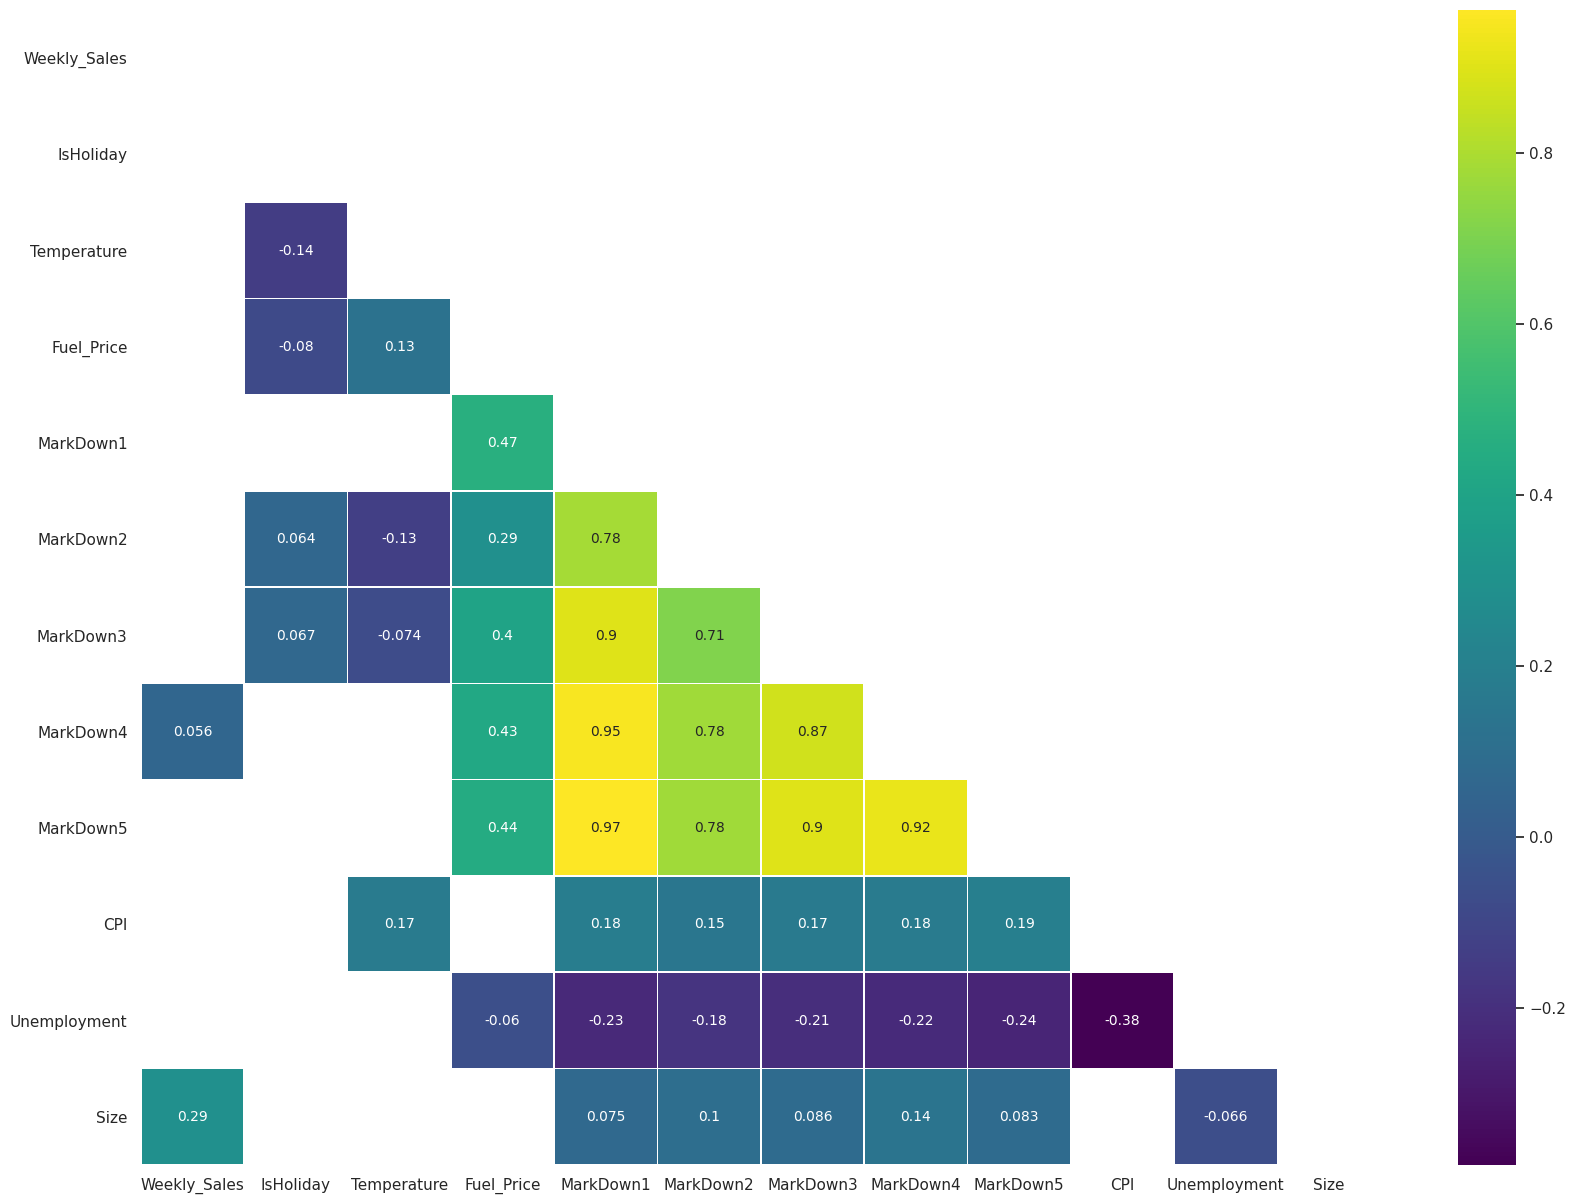



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



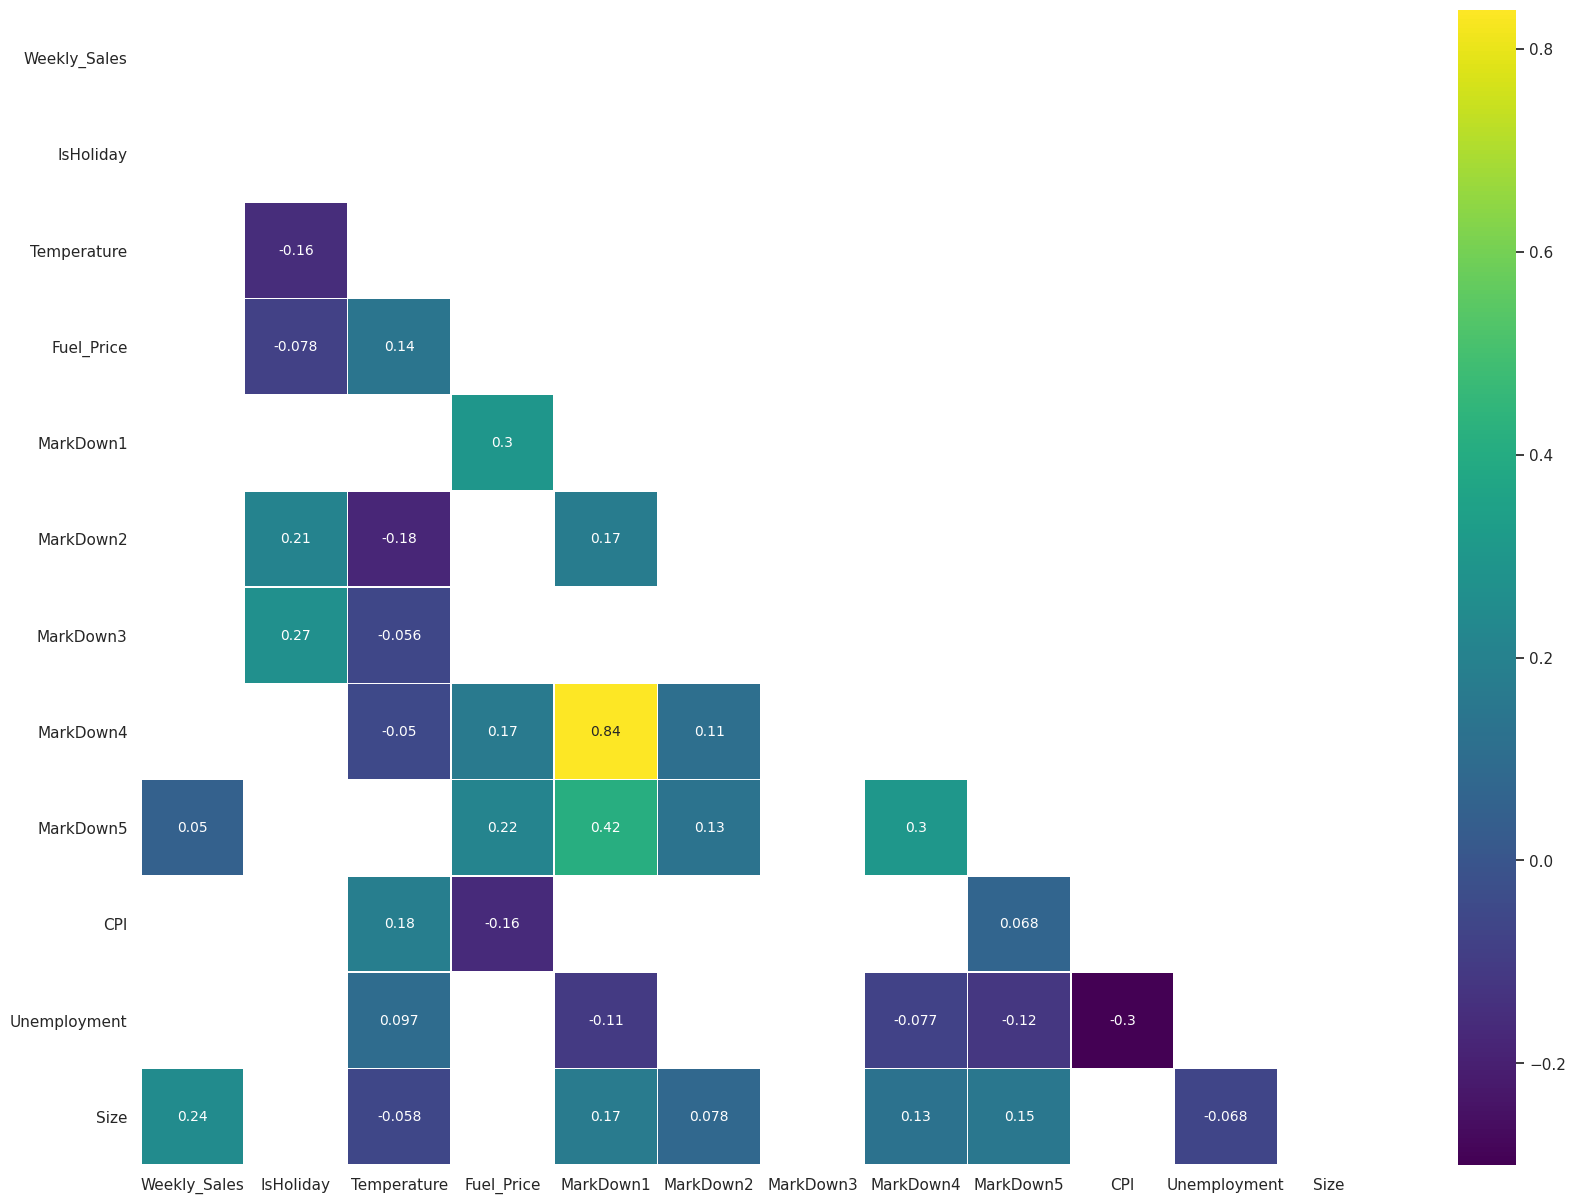



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



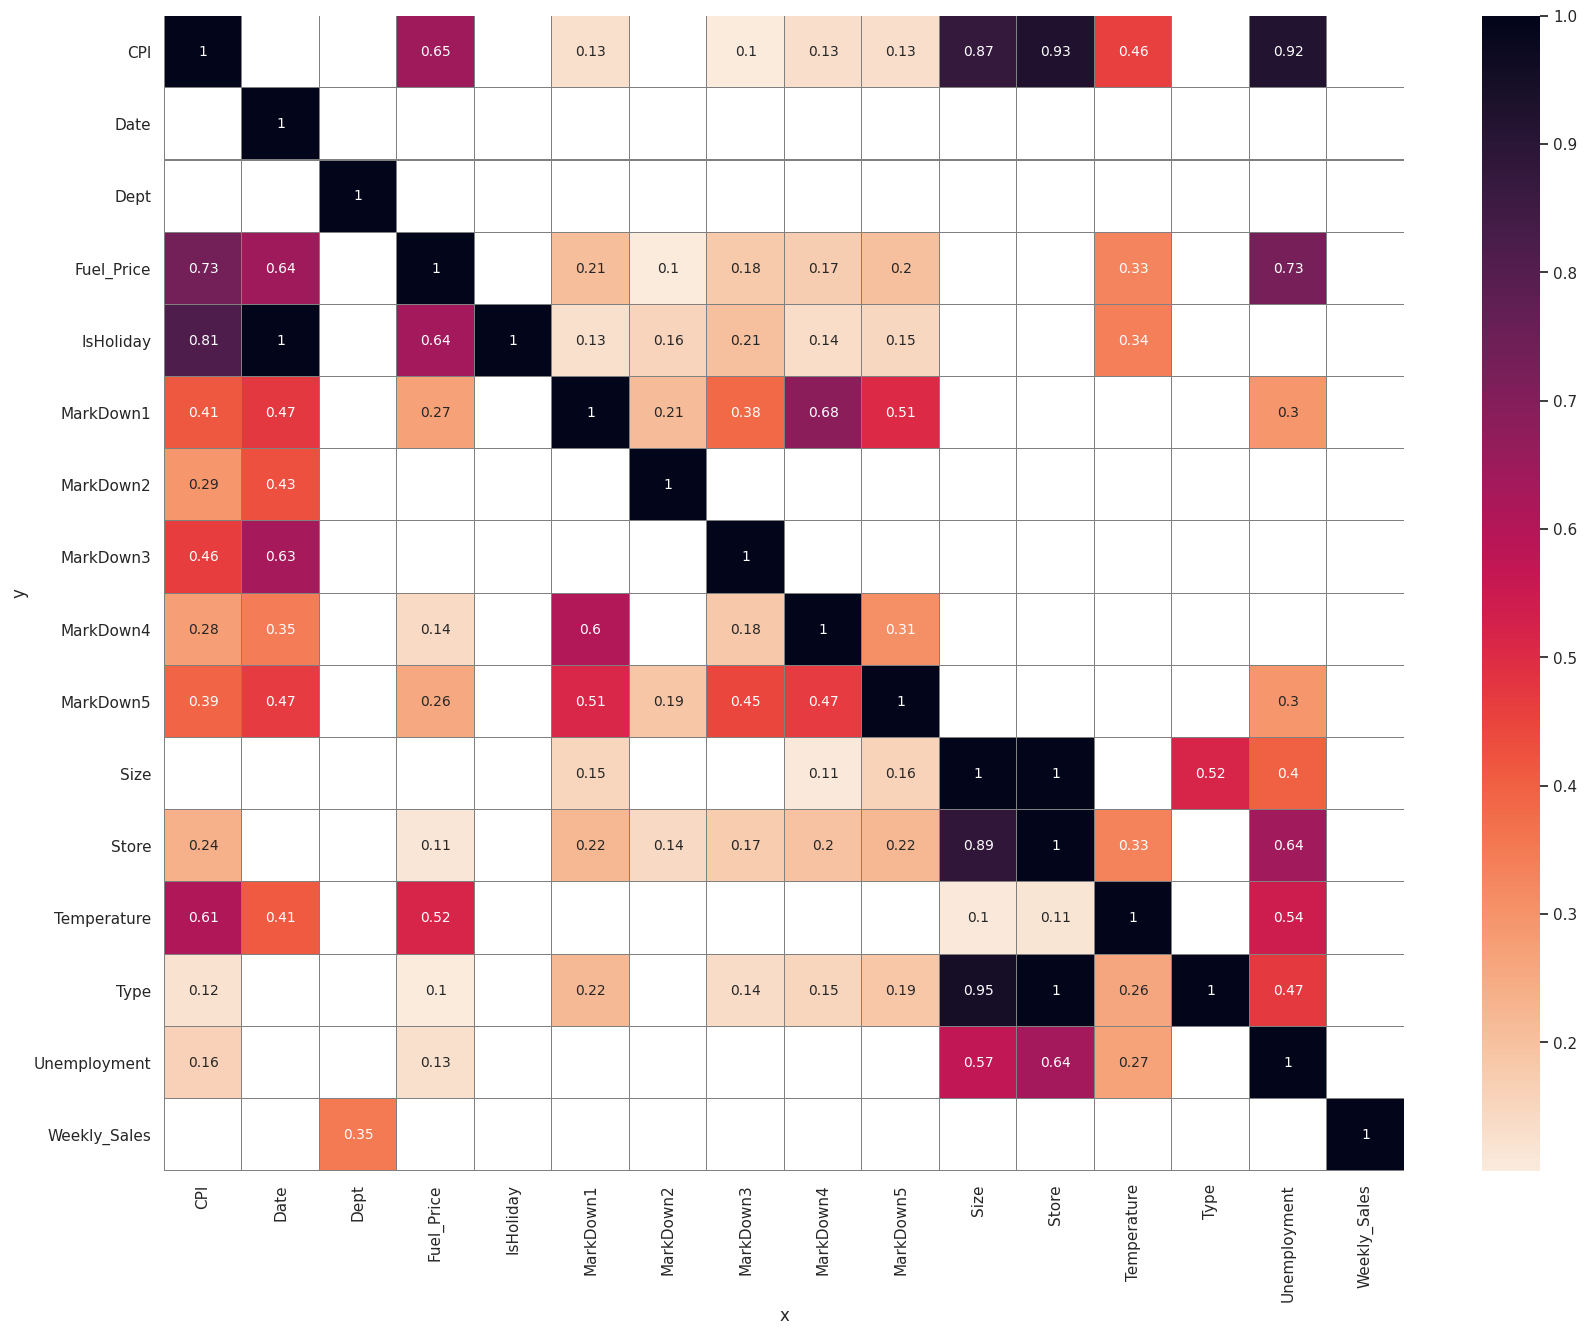

In [12]:
DisplayCorrAndPPS(df_corr_pearson=df_corr_pearson,
                  df_corr_spearman=df_corr_spearman,
                  pps_matrix=pps_matrix,
                  CorrThreshold=0.05, PPS_Threshold=0.1,
                  figsize=(20, 15), font_annot=10)

### Feature Engineering

In [13]:
def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape 
    - Once transformed, use a reporting tool, like ydata-profiling, to evaluate distributions

    """
    check_missing_values(df)
    allowed_types = ['numerical', 'onehot_encoder',  'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    # Check analysis type
    if analysis_type == None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    # Set suffix columns according to analysis_type
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'onehot_encoder':
        list_column_transformers = ["onehot_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):

    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'onehot_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        if analysis_type != 'onehot_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)

        print("\n")

def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#432371'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OneHotEncoder(variables=[f"{column}_onehot_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked = [coloh for coloh in df_feat_eng.columns if f"{column}_onehot_encoder" in coloh]

    except:
        df_feat_eng.drop([f"{column}_onehot_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):

    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

        # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked

### Feature Engineering Execution

### Categorical Encoding - OneHotEncoder

In [14]:
variables_engineering= ['Store', 'Dept', 'Type']
variables_engineering

['Store', 'Dept', 'Type']

Create a separate DataFrame, with your variable(s)

In [15]:
df_engineering = df[variables_engineering].copy()
df_engineering.head(3)

,Store,Dept,Type
0,1,1,A
1,1,2,A
2,1,3,A


Create engineered variables(s), apply the transformation(s), assess engineered variables distribution and select the most suitable method for each variable.

* Variable Analyzed: Store
* Applied transformation: ['Store_onehot_encoder_1', 'Store_onehot_encoder_2', 'Store_onehot_encoder_3', 'Store_onehot_encoder_4', 'Store_onehot_encoder_5', 'Store_onehot_encoder_6', 'Store_onehot_encoder_7', 'Store_onehot_encoder_8', 'Store_onehot_encoder_9', 'Store_onehot_encoder_10', 'Store_onehot_encoder_11', 'Store_onehot_encoder_12', 'Store_onehot_encoder_13', 'Store_onehot_encoder_14', 'Store_onehot_encoder_15', 'Store_onehot_encoder_16', 'Store_onehot_encoder_17', 'Store_onehot_encoder_18', 'Store_onehot_encoder_19', 'Store_onehot_encoder_20', 'Store_onehot_encoder_21', 'Store_onehot_encoder_22', 'Store_onehot_encoder_23', 'Store_onehot_encoder_24', 'Store_onehot_encoder_25', 'Store_onehot_encoder_26', 'Store_onehot_encoder_27', 'Store_onehot_encoder_28', 'Store_onehot_encoder_29', 'Store_onehot_encoder_30', 'Store_onehot_encoder_31', 'Store_onehot_encoder_32', 'Store_onehot_encoder_33', 'Store_onehot_encoder_34', 'Store_onehot_encoder_35', 'Store_one

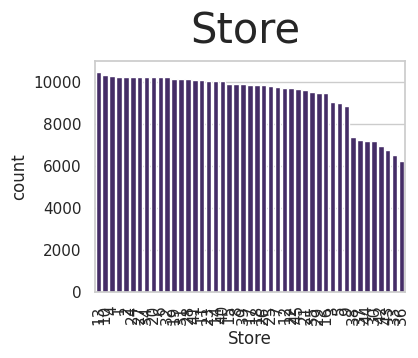































































































* Variable Analyzed: Dept
* Applied transformation: ['Dept_onehot_encoder_1', 'Dept_onehot_encoder_2', 'Dept_onehot_encoder_3', 'Dept_onehot_encoder_4', 'Dept_onehot_encoder_5', 'Dept_onehot_encoder_6', 'Dept_onehot_encoder_7', 'Dept_onehot_encoder_8', 'Dept_onehot_encoder_9', 'Dept_onehot_encoder_10', 'Dept_onehot_encoder_11', 'Dept_onehot_encoder_12', 'Dept_onehot_encoder_13', 'Dept_onehot_encoder_14', 'Dept_onehot_encoder_16', 'Dept_onehot_encoder_17', 'Dept_onehot_encoder_18', 'Dept_onehot_encoder_19', 'Dept_onehot_encoder_20', 'Dept_onehot_encoder_21', 'Dept_onehot_encoder_22', 'Dept_onehot_encoder_23', 'Dept_onehot_encoder_24', 'Dept_onehot_encoder_25', 'Dept_onehot_encoder_26', 'Dept_onehot_encoder_27', 'Dept_onehot_encoder_28', 'Dept_onehot_encoder_29', 'Dept_onehot_encoder_30', 'Dept_onehot_encoder_31', 'Dept_onehot_encoder_32', 'Dept_onehot_encoder_33', 'Dept_onehot_encoder_34', 'Dep

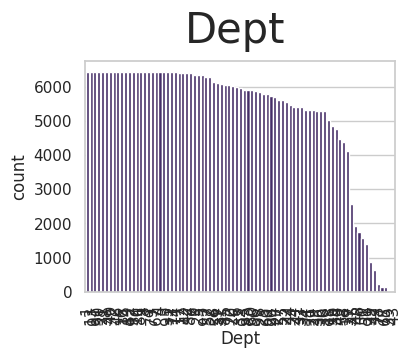







































































































































































* Variable Analyzed: Type
* Applied transformation: ['Type_onehot_encoder_A', 'Type_onehot_encoder_B', 'Type_onehot_encoder_C'] 



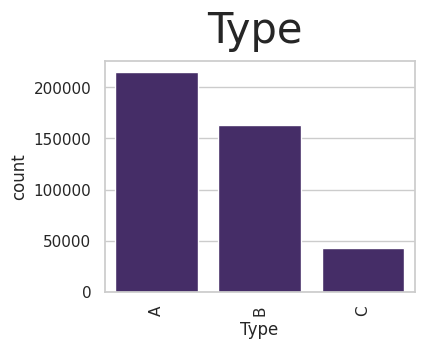

In [16]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='onehot_encoder')

Apply the selected transformation

In [17]:
encoder = OneHotEncoder(variables = variables_engineering)
df = encoder.fit_transform(df)

print("* Categorical encoding - ordinal transformation done!")

* Categorical encoding - ordinal transformation done!


### Numerical Transformation

Select variable(s)

In [18]:
variables_engineering =  ['Temperature',
                        'Fuel_Price',
                        'MarkDown1',
                        'MarkDown2',
                        'MarkDown3',
                        'MarkDown4',
                        'MarkDown5',
                        'CPI',
                        'Unemployment',
                        'Size'
                         ]


variables_engineering

['Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Size']

Create a separate DataFrame, with your variable(s)

In [19]:
df_engineering = df[variables_engineering].copy()
df_engineering.head(3)

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,59.17,3.524,0.0,0.0,0.0,0.0,0.0,214.837166,7.682,151315
1,59.17,3.524,0.0,0.0,0.0,0.0,0.0,214.837166,7.682,151315
2,59.17,3.524,0.0,0.0,0.0,0.0,0.0,214.837166,7.682,151315


Create engineered variables(s), apply the transformation(s), assess engineered variables distribution and select the most suitable method

* Variable Analyzed: Temperature
* Applied transformation: ['Temperature_reciprocal', 'Temperature_power', 'Temperature_yeo_johnson'] 



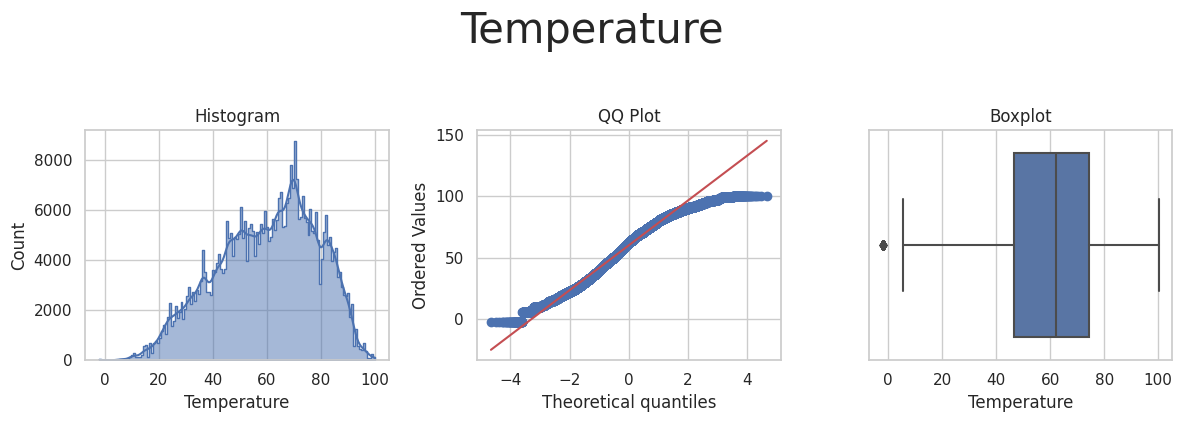

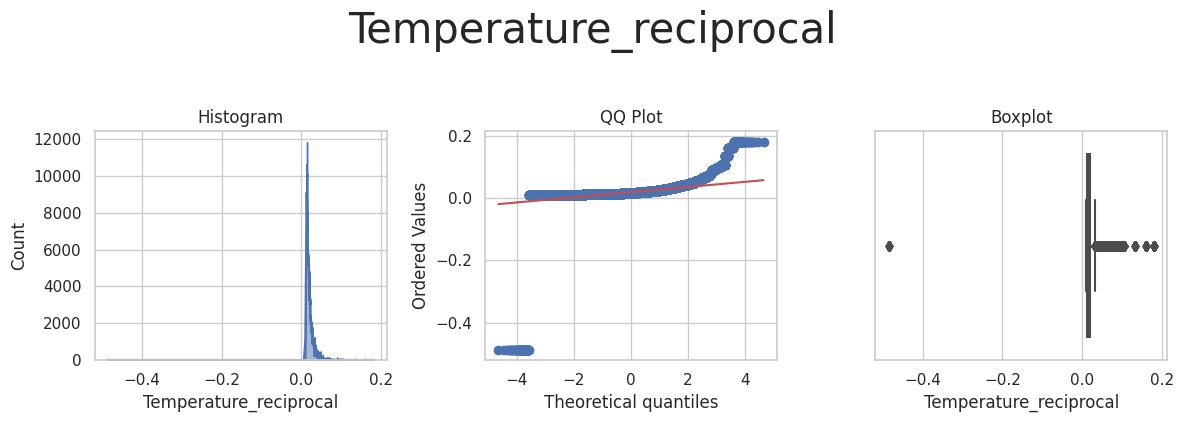

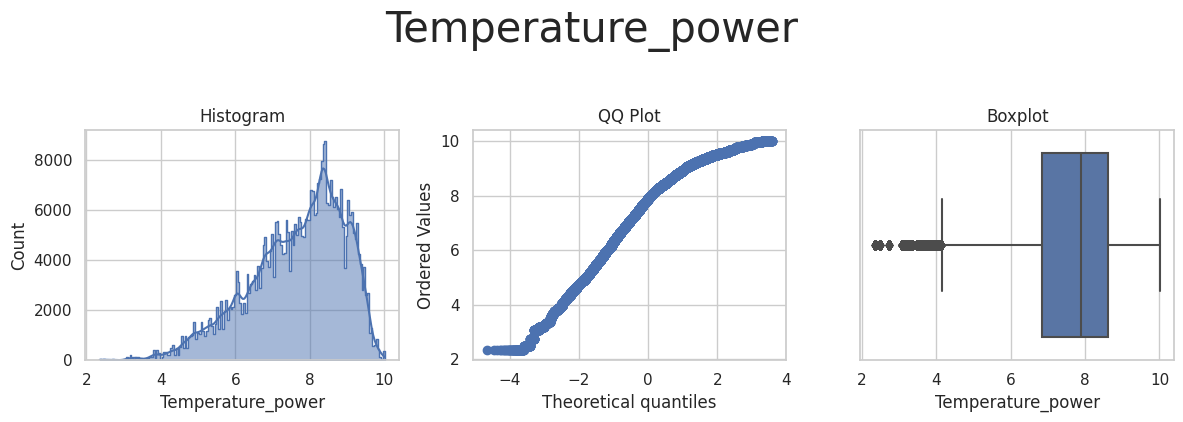

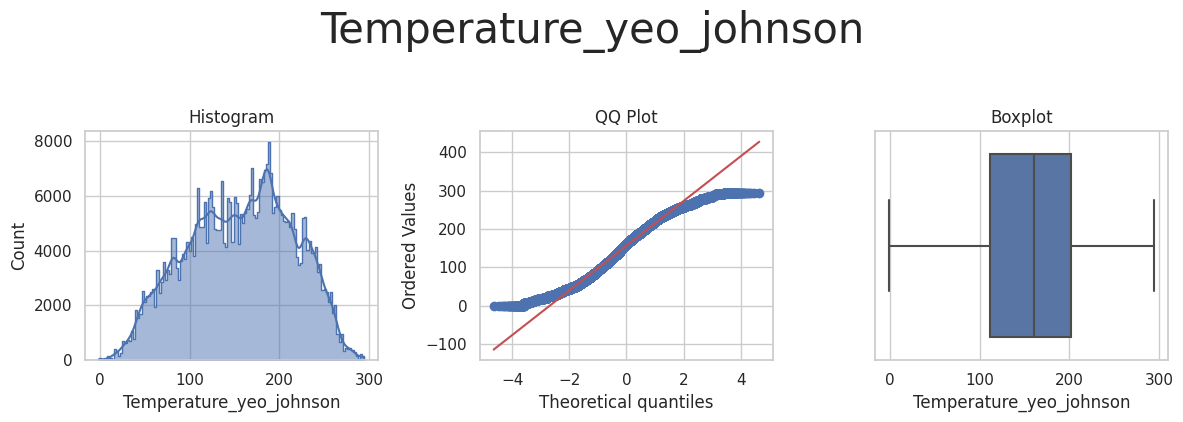



* Variable Analyzed: Fuel_Price
* Applied transformation: ['Fuel_Price_log_e', 'Fuel_Price_log_10', 'Fuel_Price_reciprocal', 'Fuel_Price_power', 'Fuel_Price_box_cox', 'Fuel_Price_yeo_johnson'] 



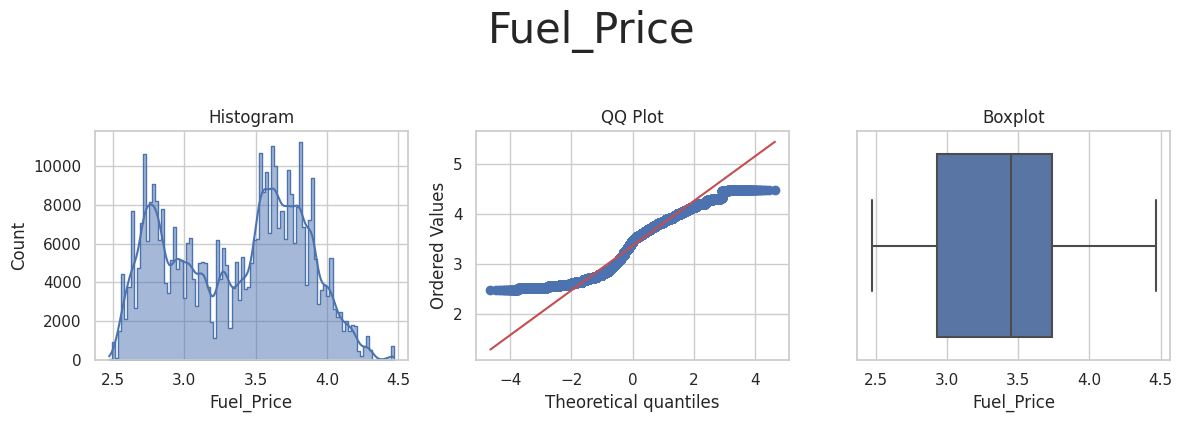

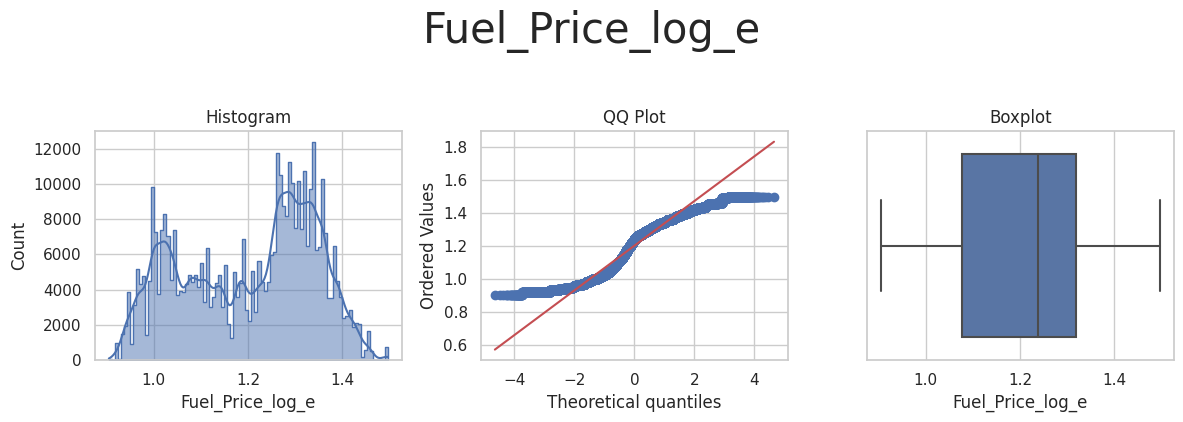

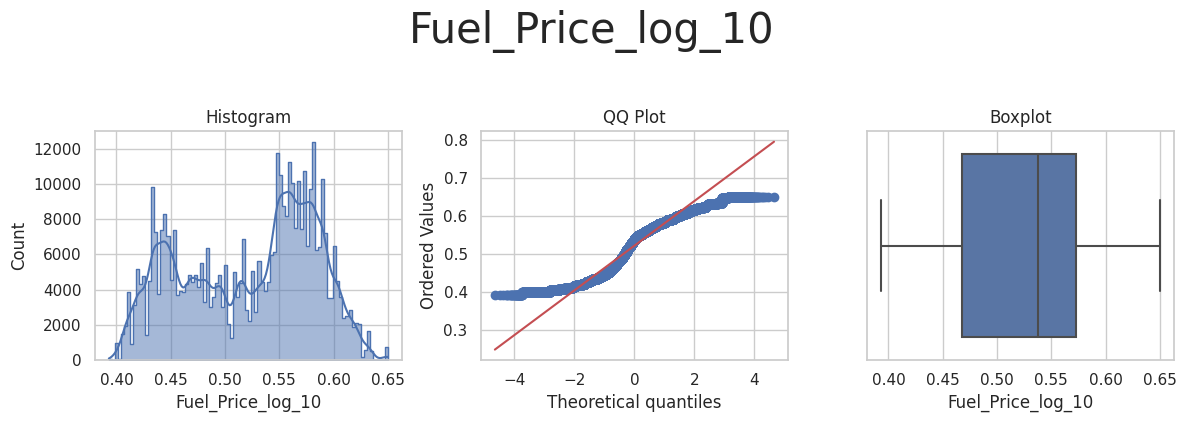

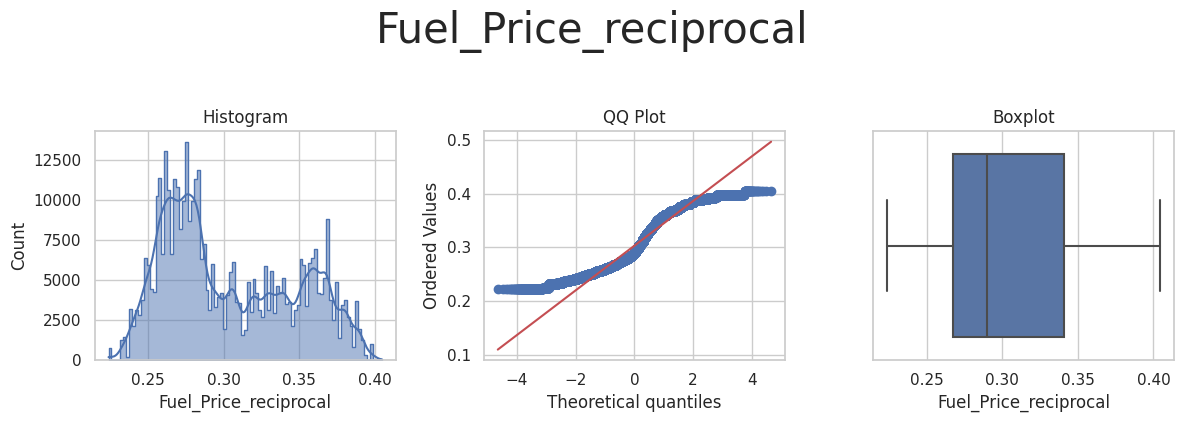

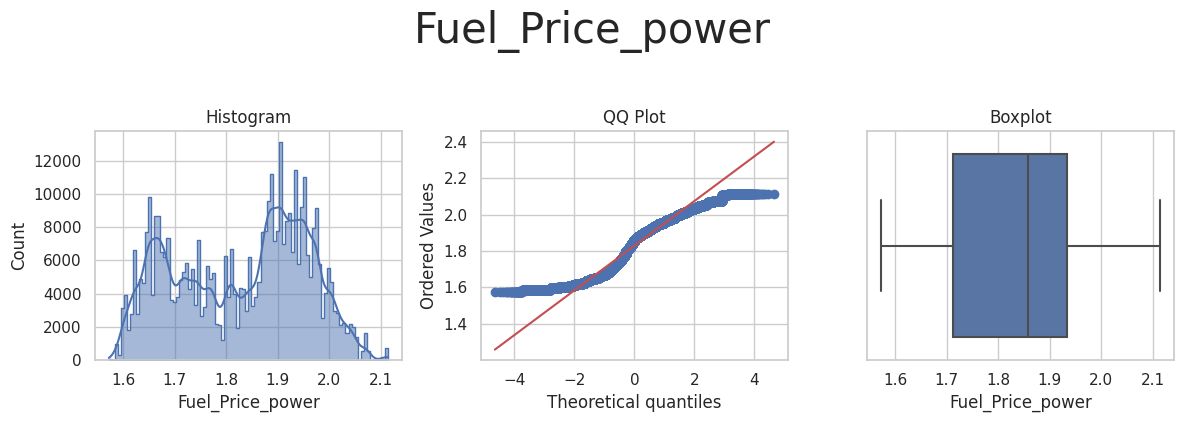

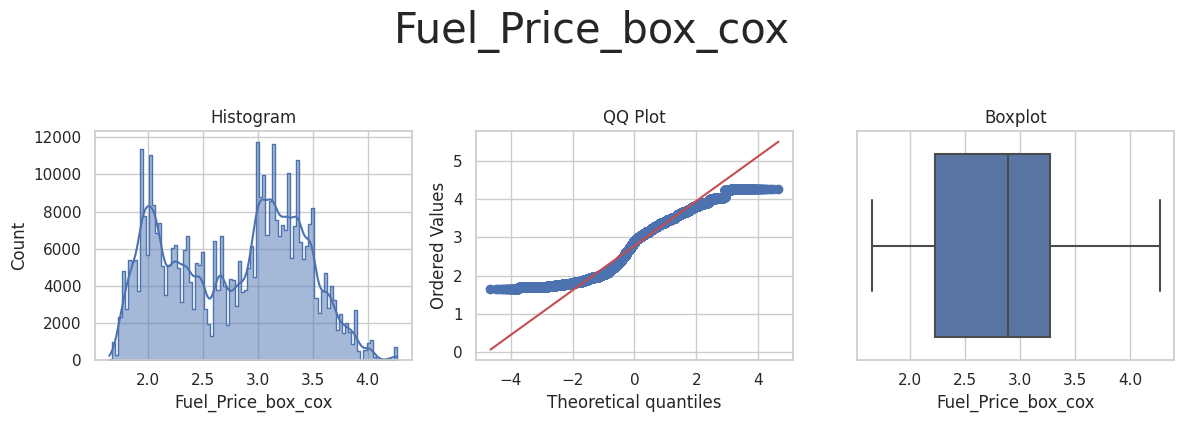

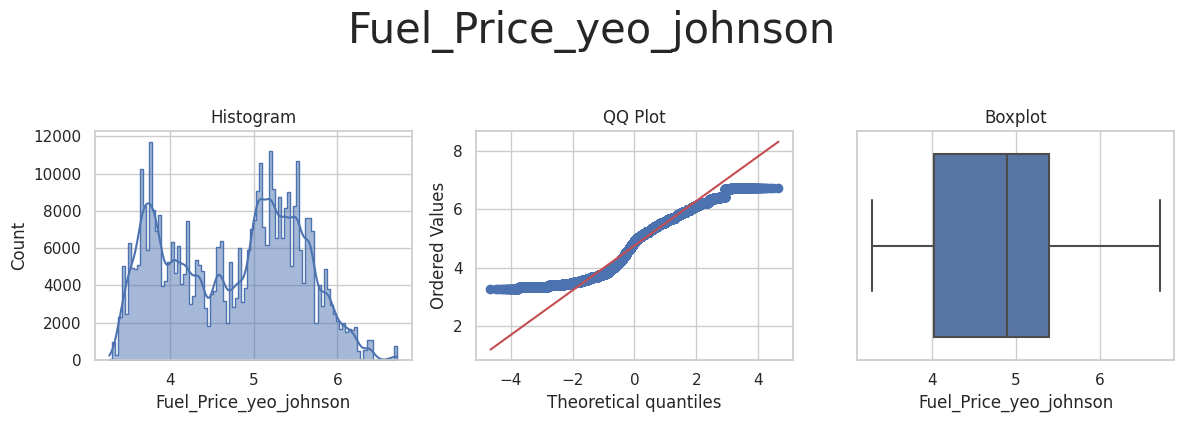



* Variable Analyzed: MarkDown1
* Applied transformation: ['MarkDown1_power', 'MarkDown1_yeo_johnson'] 



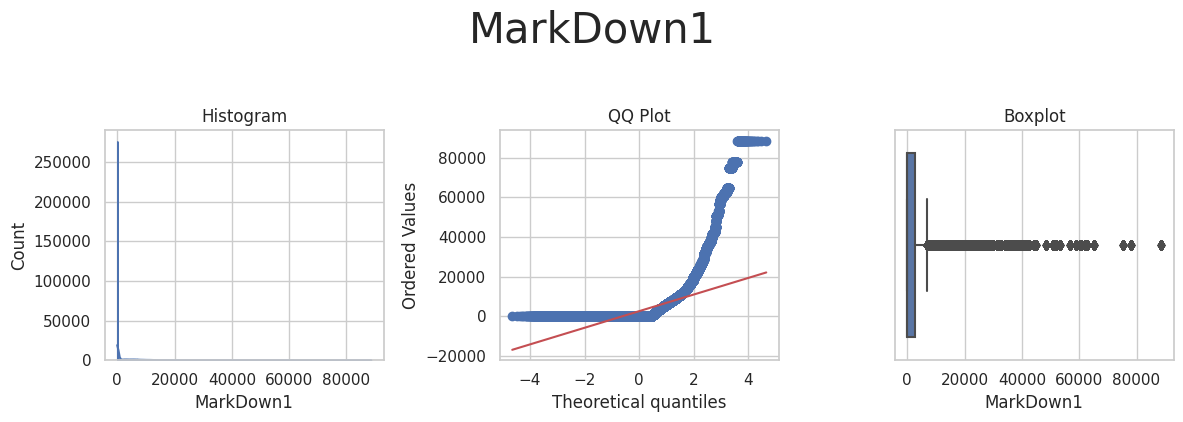

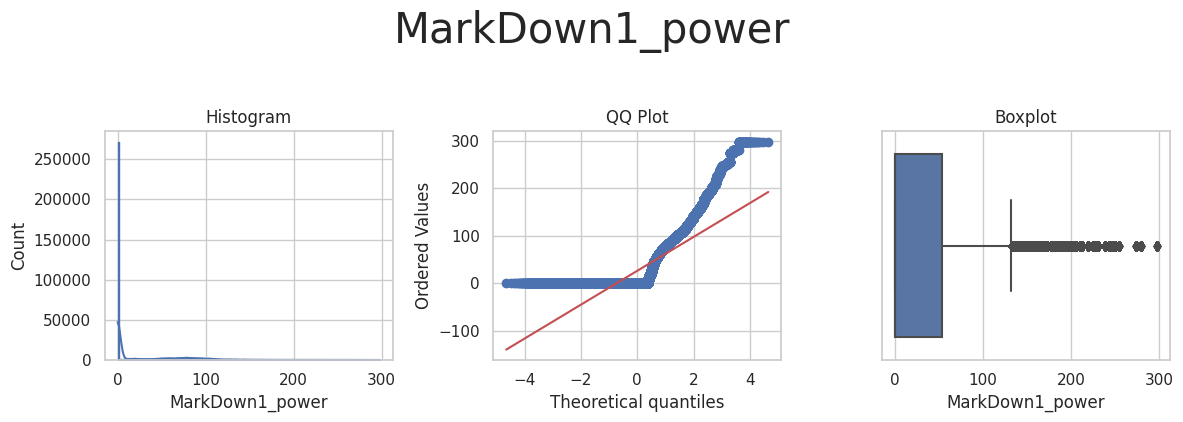

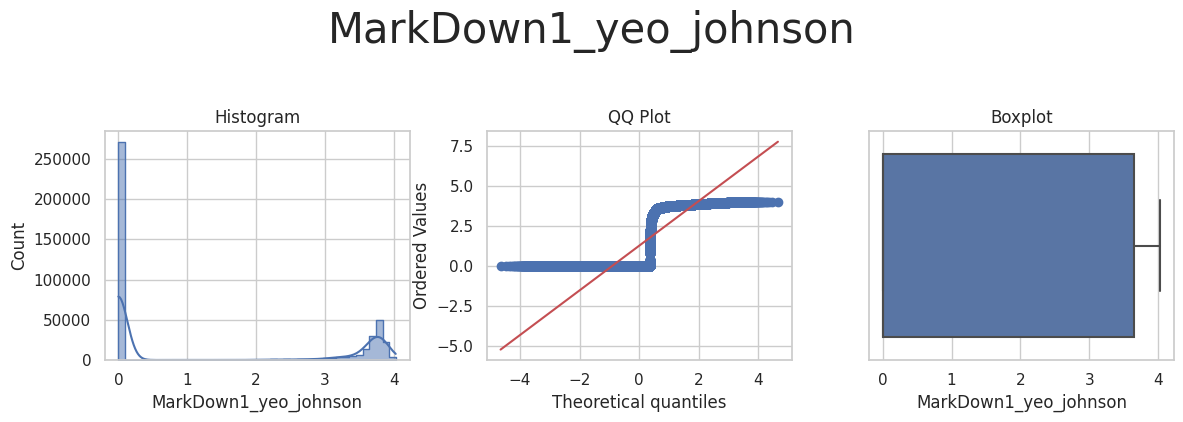



* Variable Analyzed: MarkDown2
* Applied transformation: ['MarkDown2_power', 'MarkDown2_yeo_johnson'] 



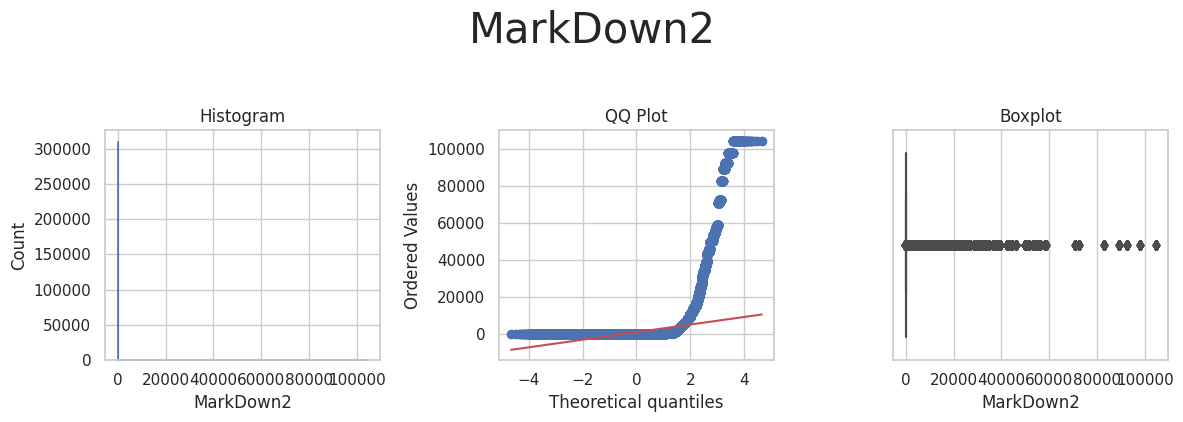

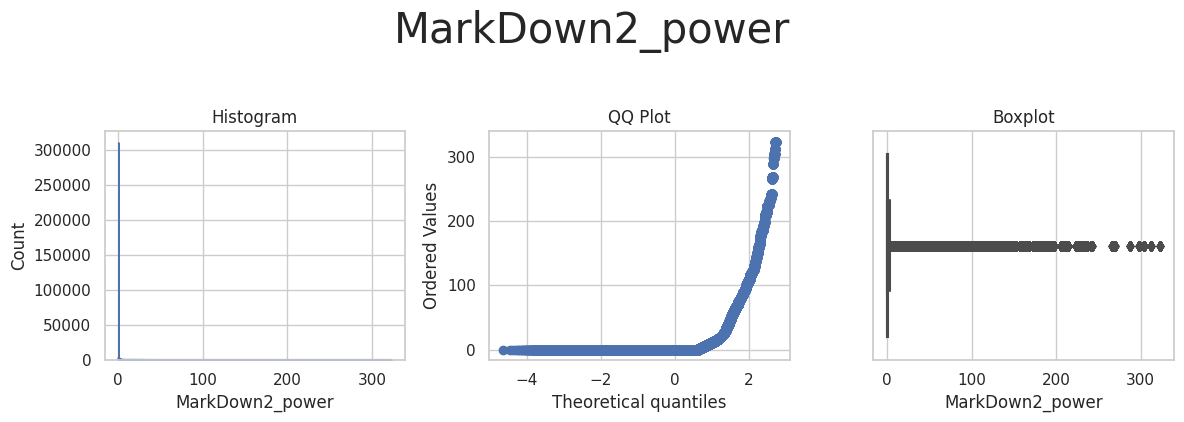

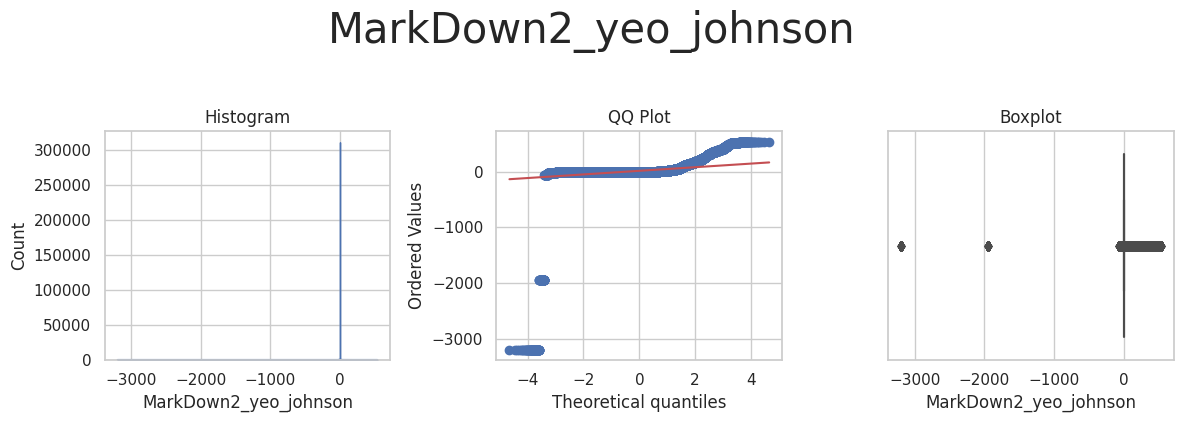



* Variable Analyzed: MarkDown3
* Applied transformation: ['MarkDown3_power', 'MarkDown3_yeo_johnson'] 



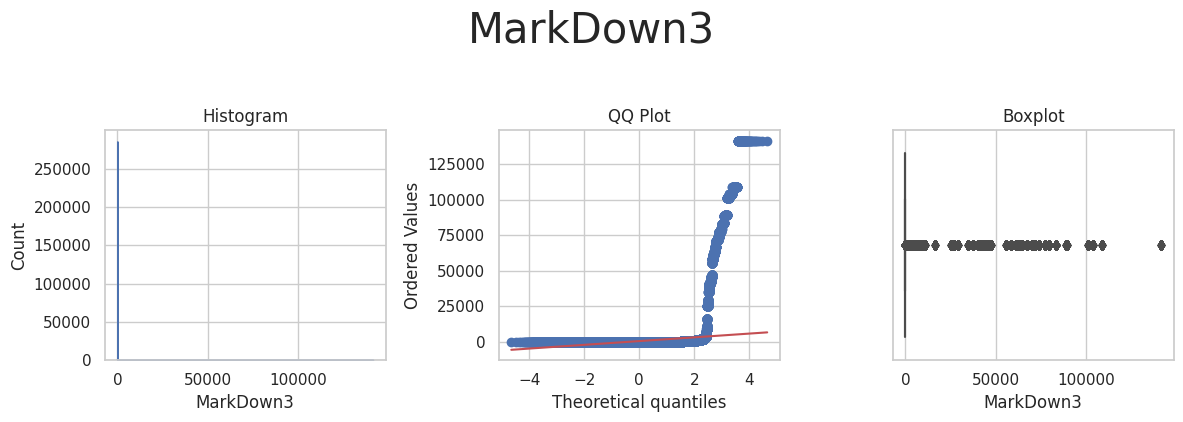

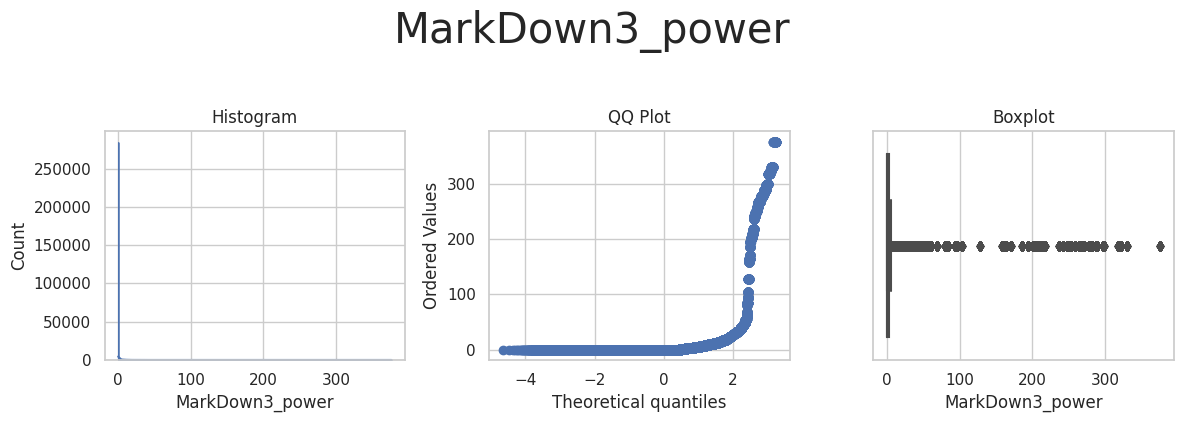

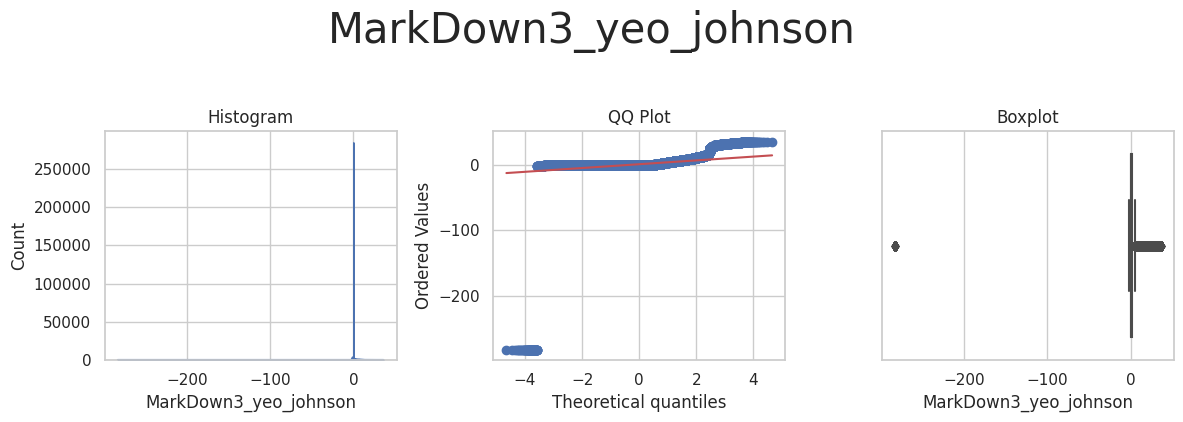



* Variable Analyzed: MarkDown4
* Applied transformation: ['MarkDown4_power', 'MarkDown4_yeo_johnson'] 



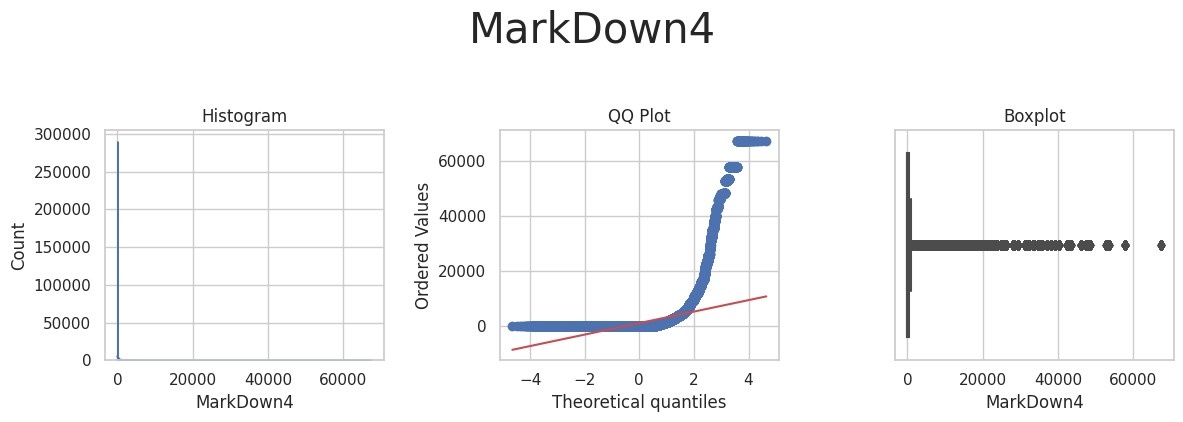

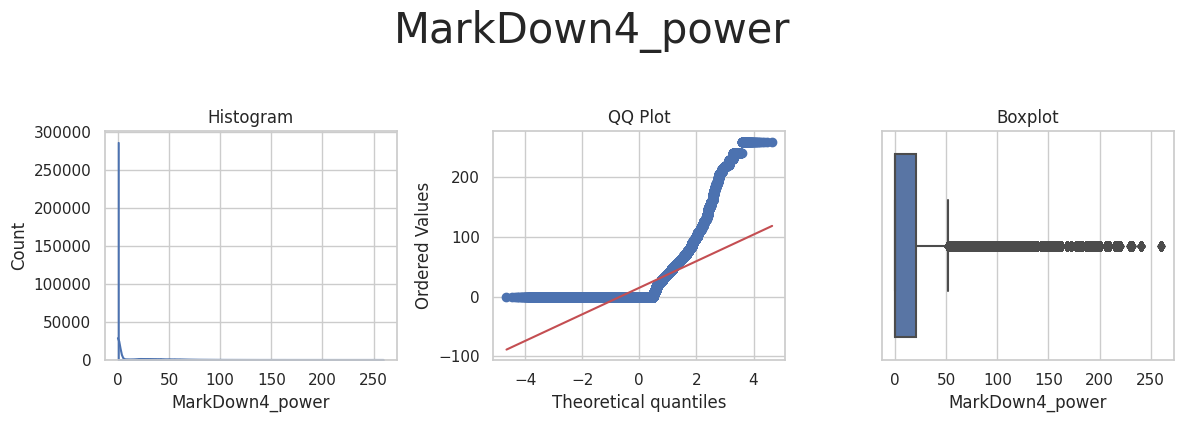

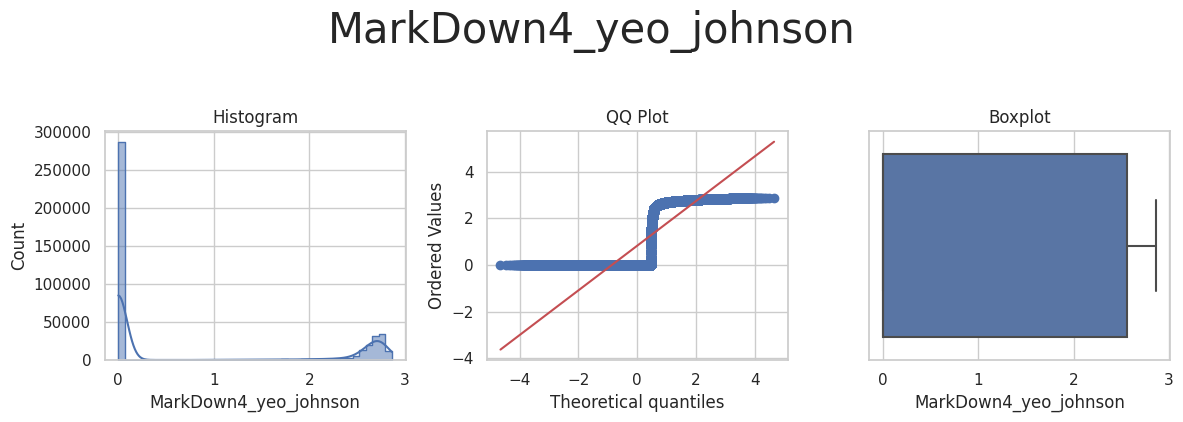



* Variable Analyzed: MarkDown5
* Applied transformation: ['MarkDown5_power', 'MarkDown5_yeo_johnson'] 



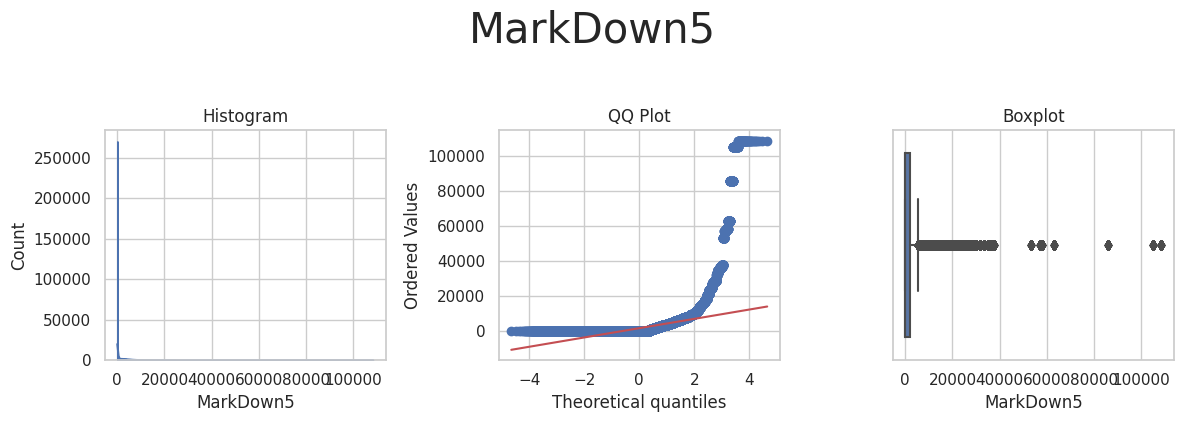

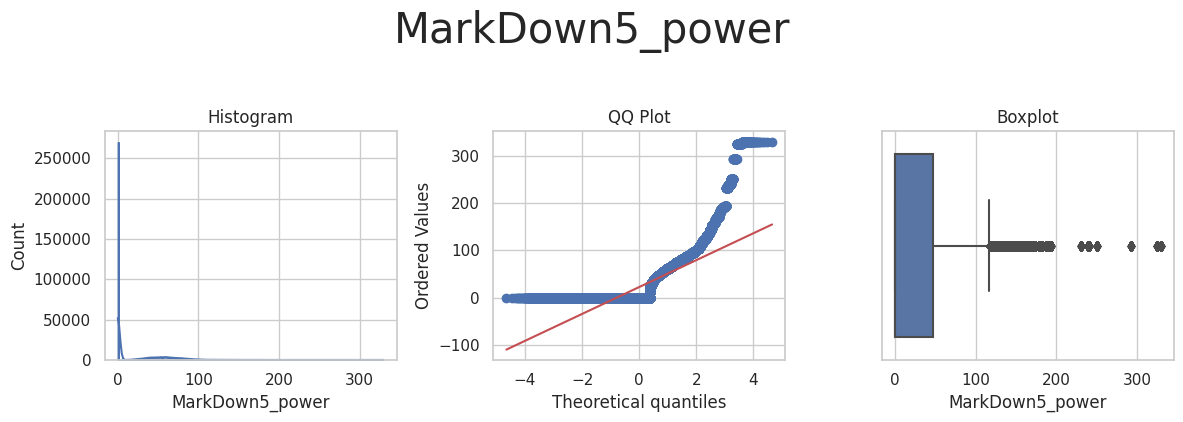

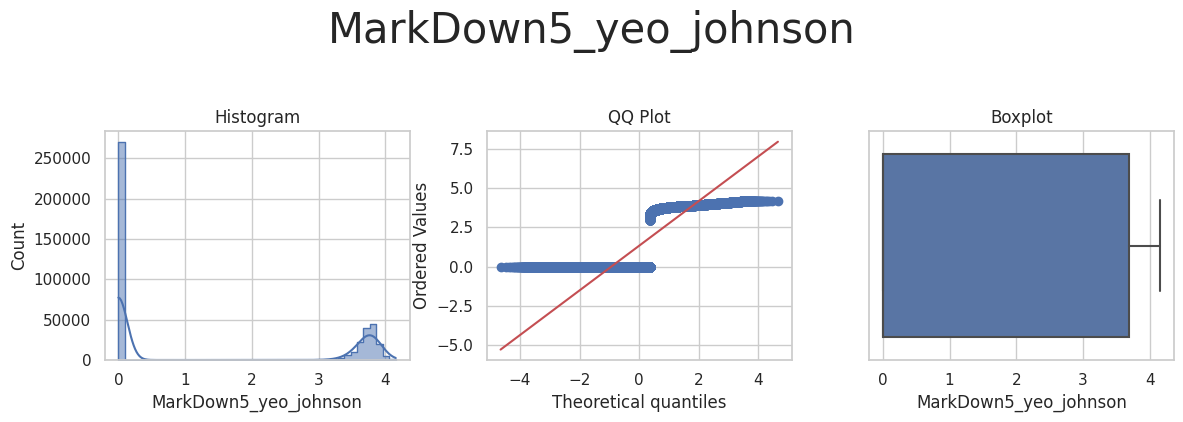



* Variable Analyzed: CPI
* Applied transformation: ['CPI_log_e', 'CPI_log_10', 'CPI_reciprocal', 'CPI_power', 'CPI_box_cox', 'CPI_yeo_johnson'] 



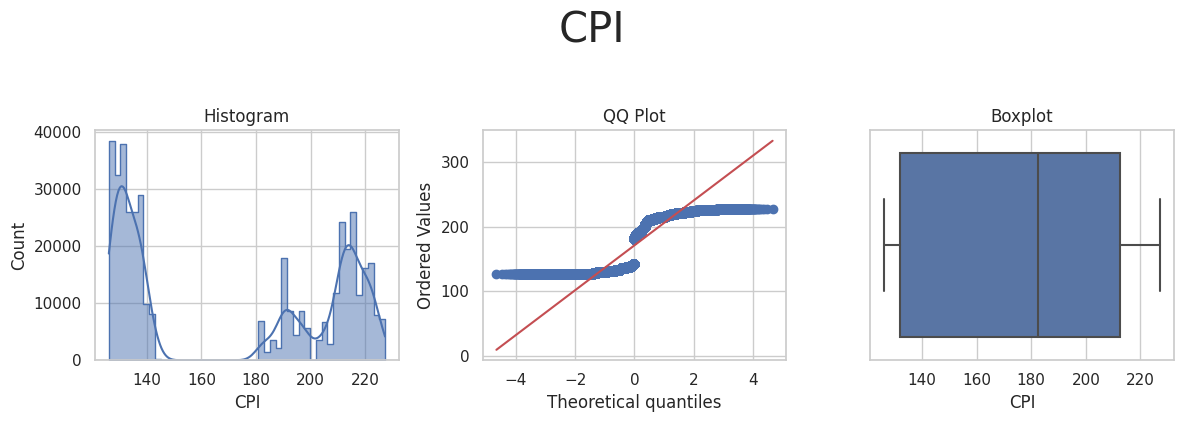

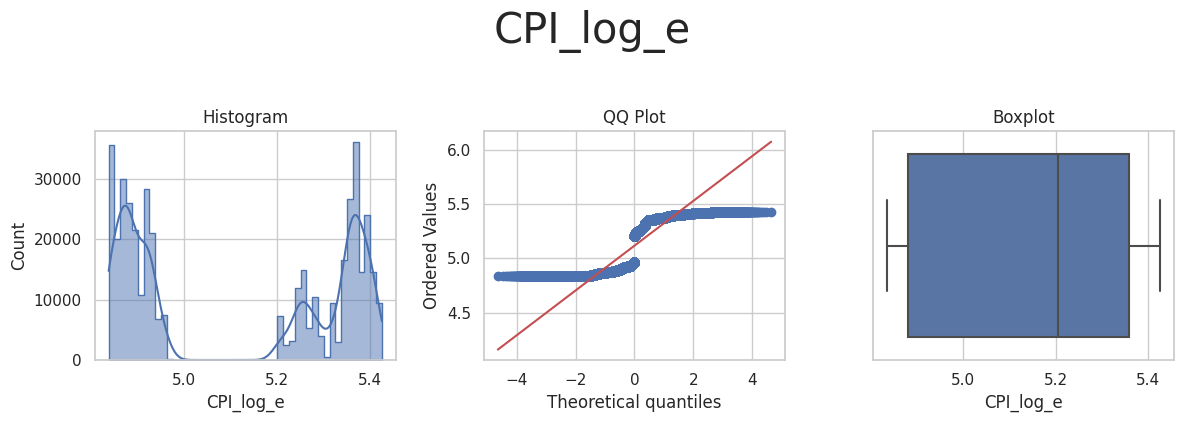

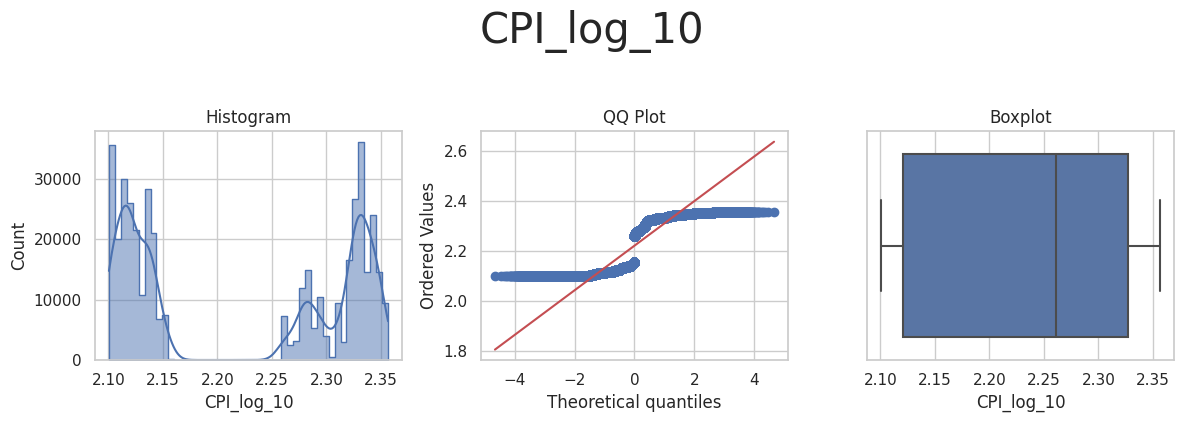

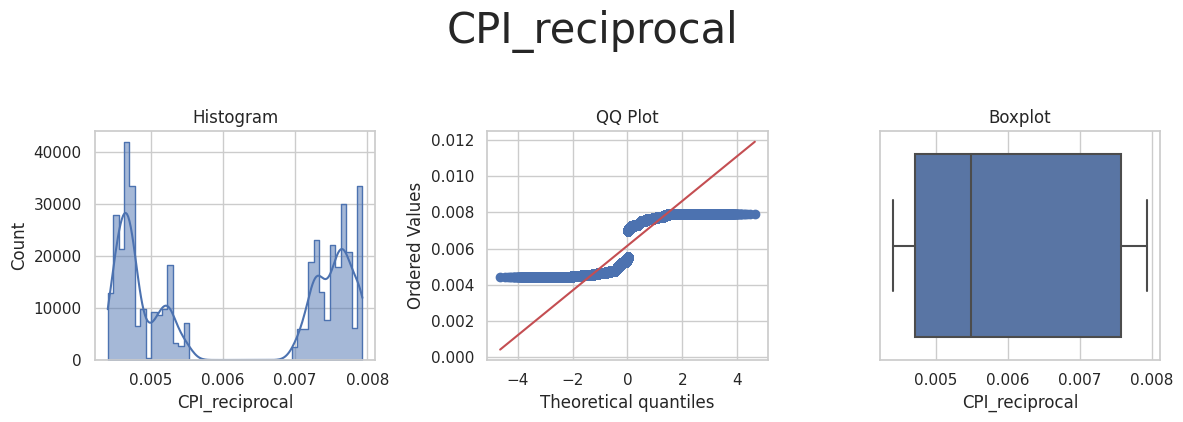

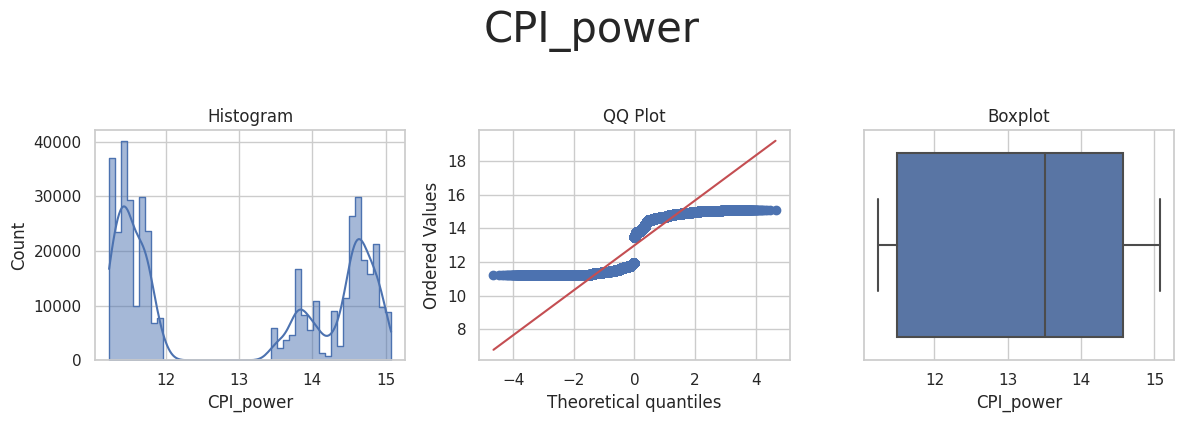

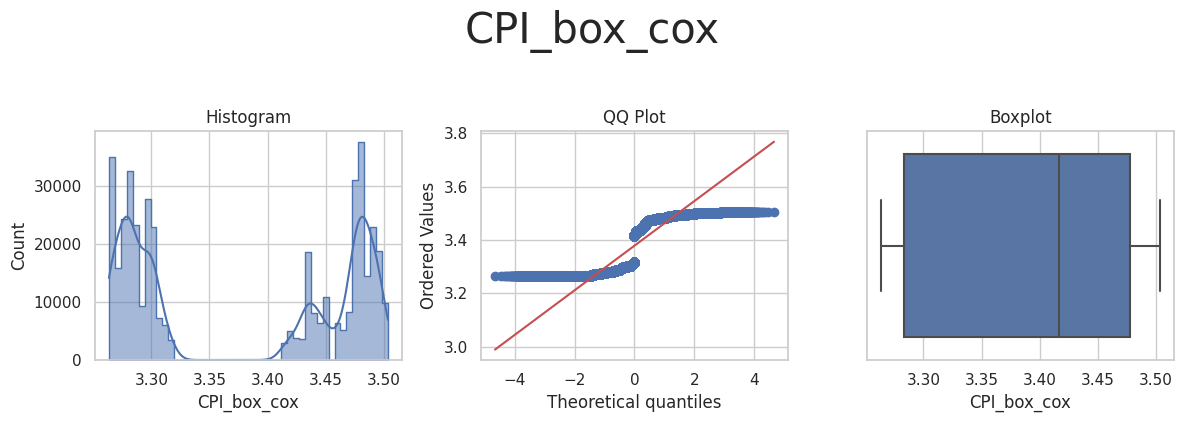

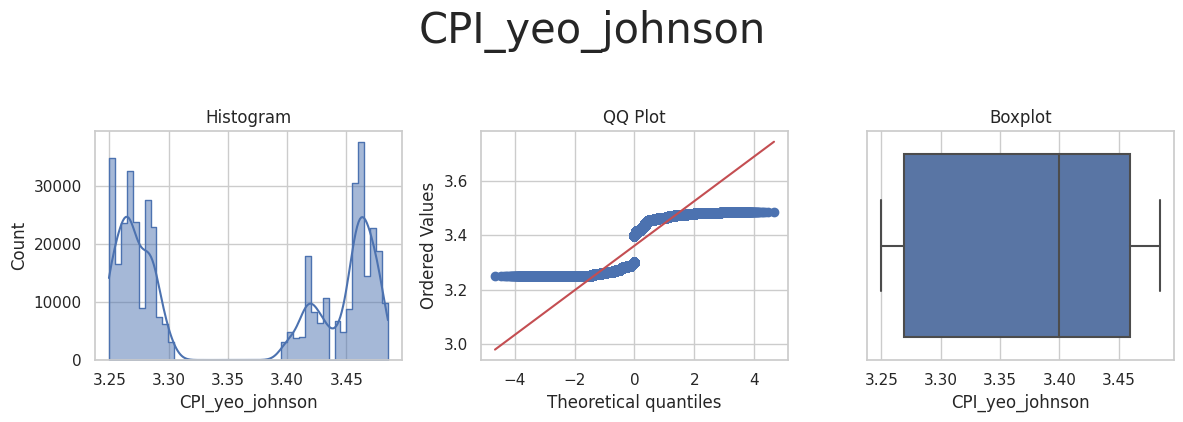



* Variable Analyzed: Unemployment
* Applied transformation: ['Unemployment_log_e', 'Unemployment_log_10', 'Unemployment_reciprocal', 'Unemployment_power', 'Unemployment_box_cox', 'Unemployment_yeo_johnson'] 



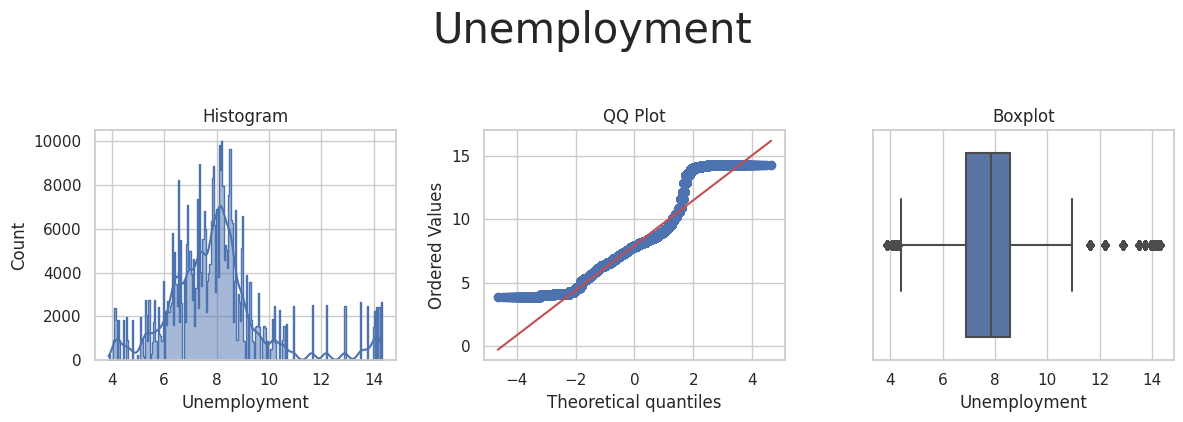

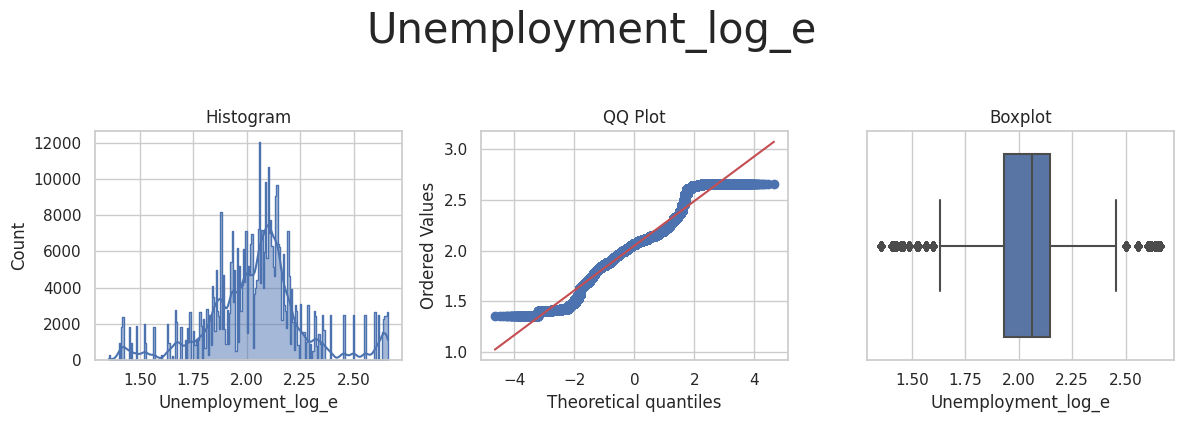

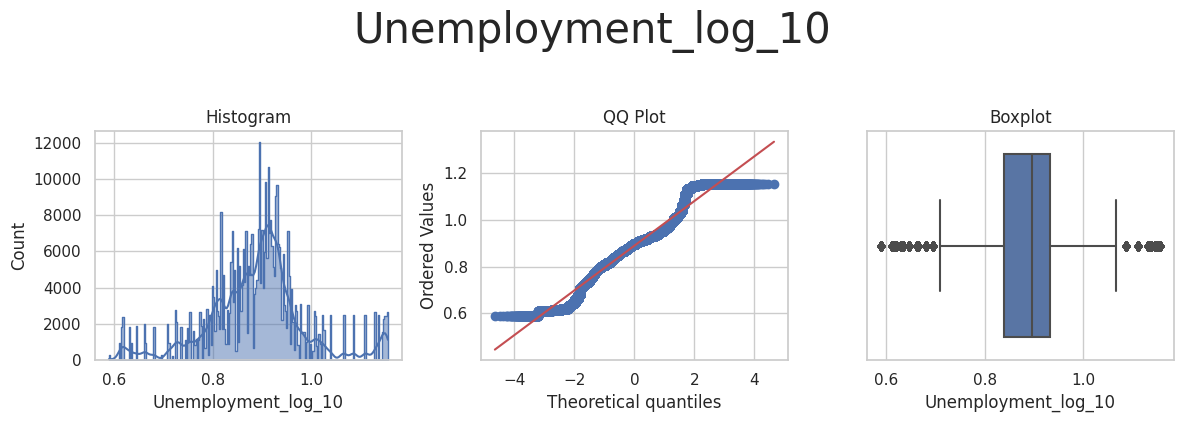

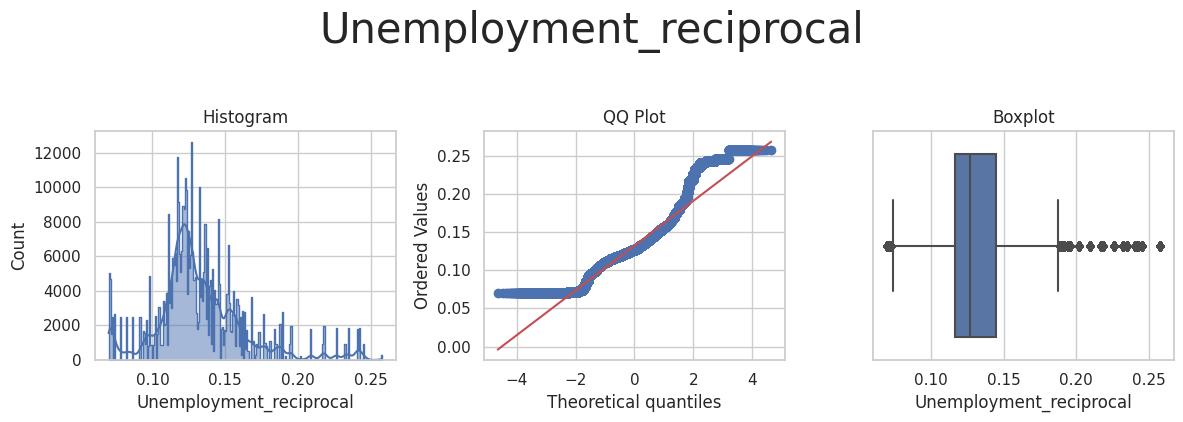

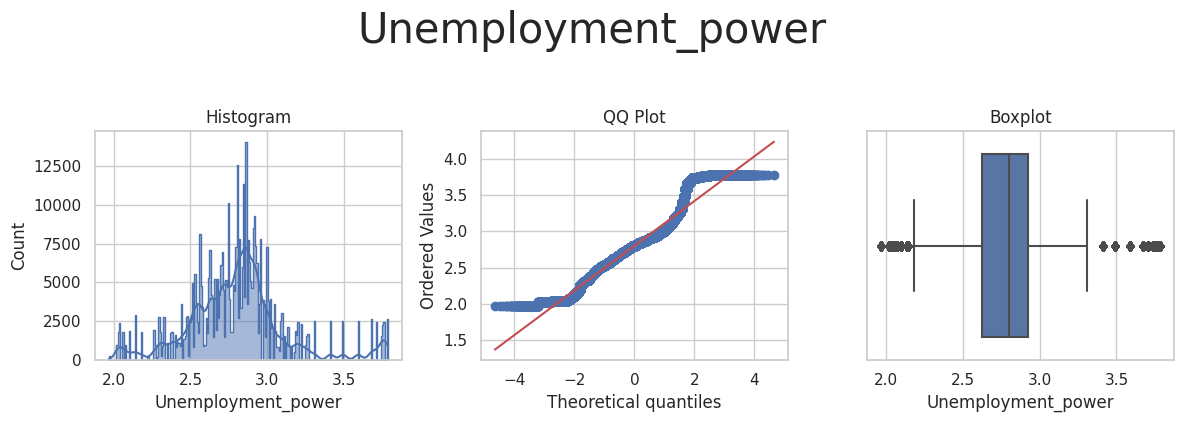

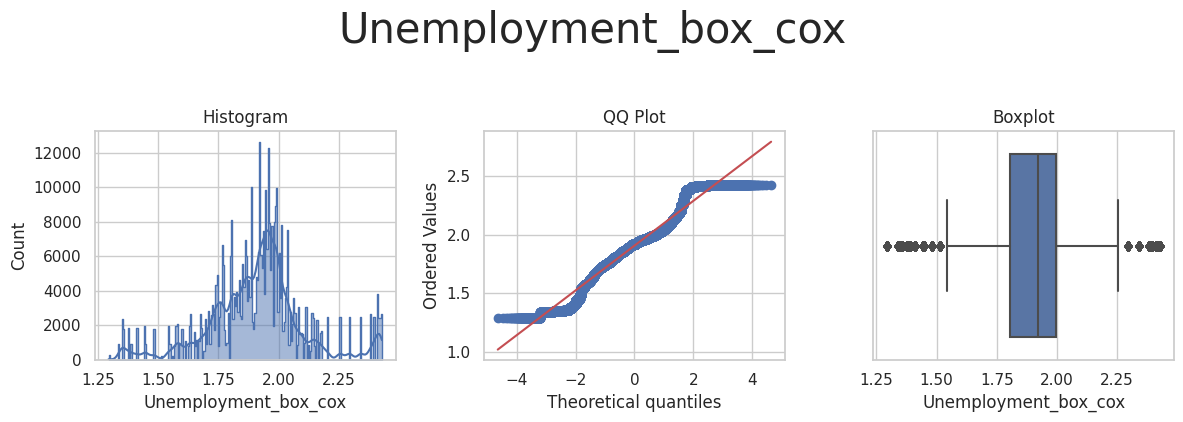

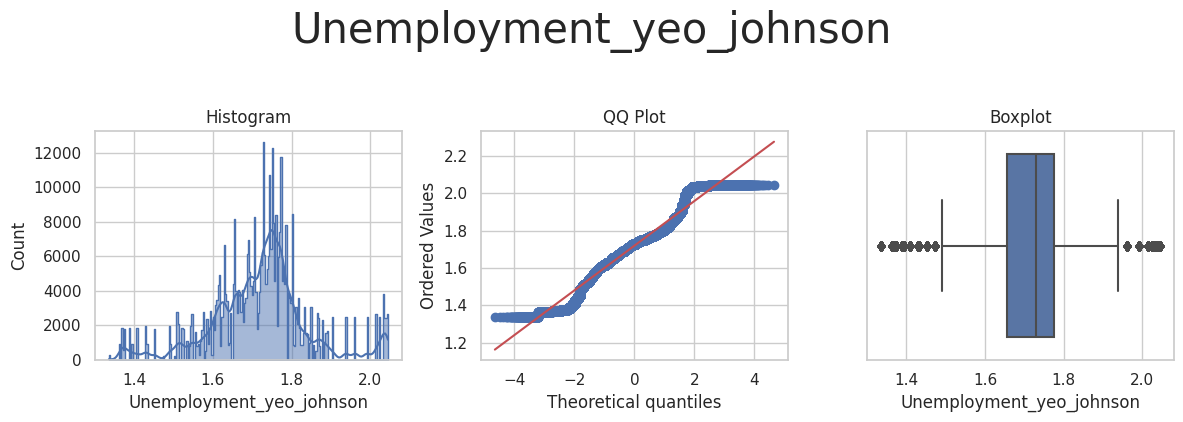



* Variable Analyzed: Size
* Applied transformation: ['Size_log_e', 'Size_log_10', 'Size_reciprocal', 'Size_power', 'Size_box_cox', 'Size_yeo_johnson'] 



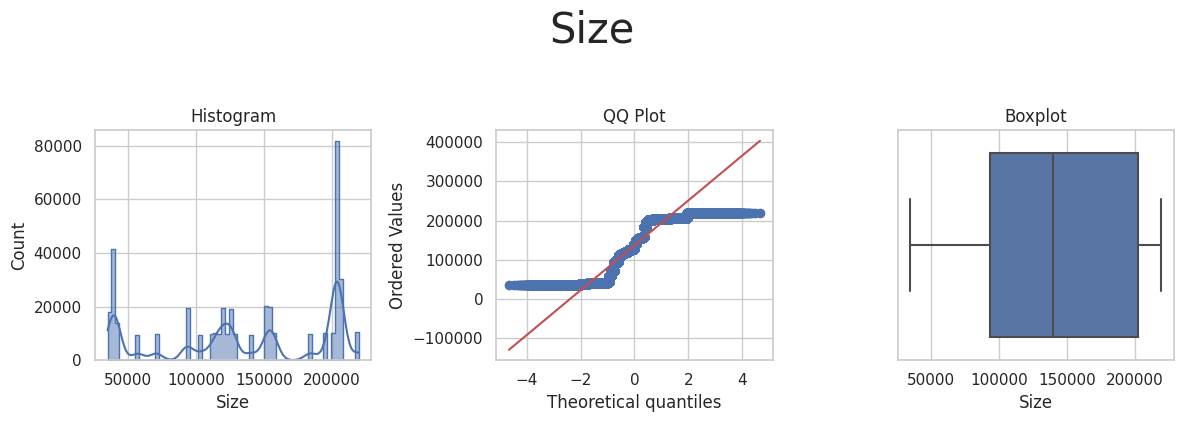

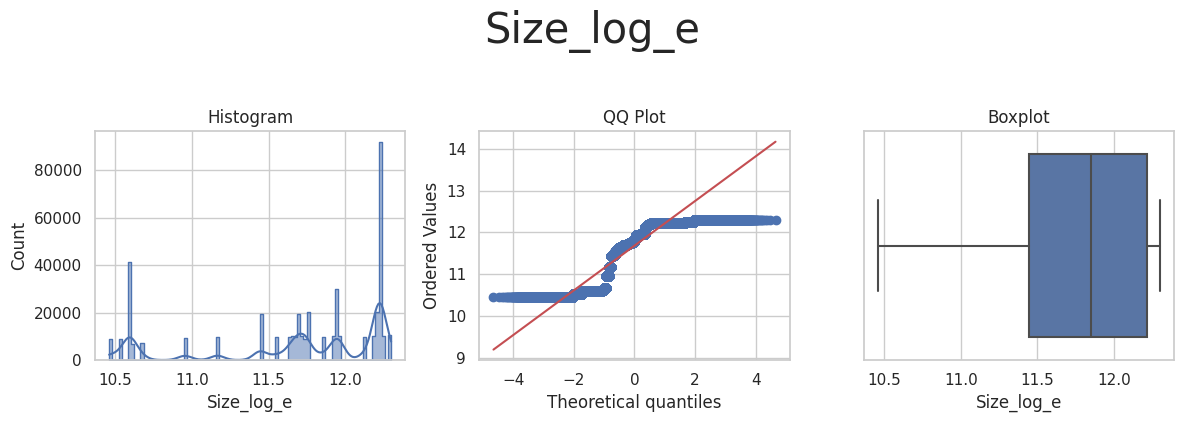

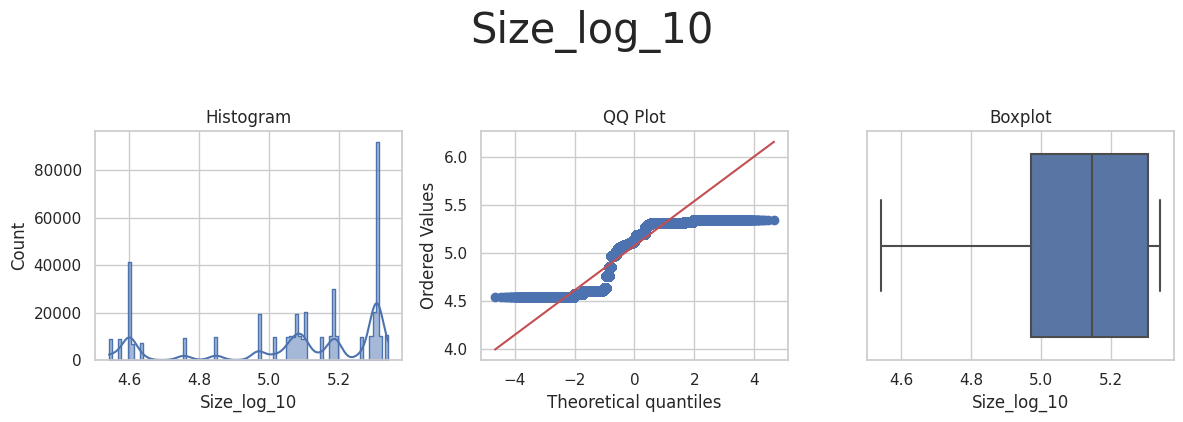

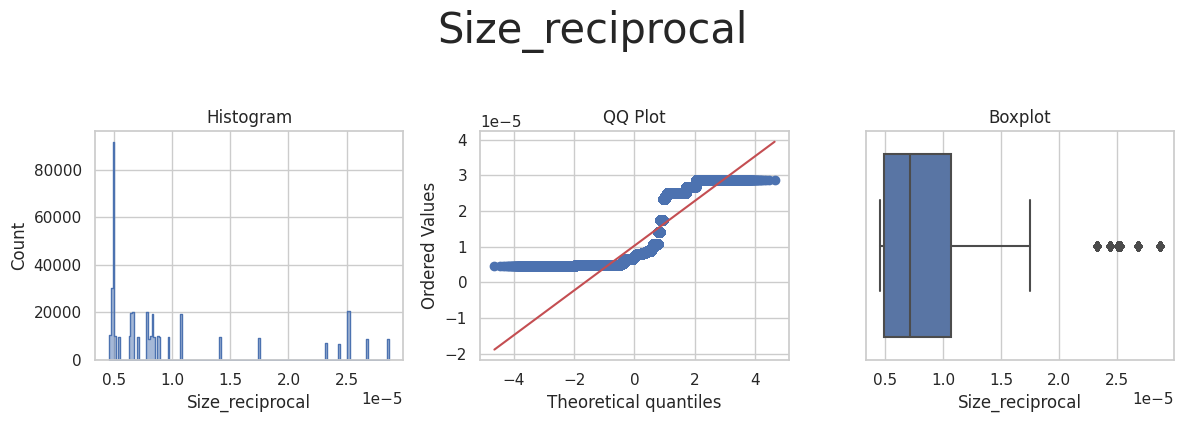

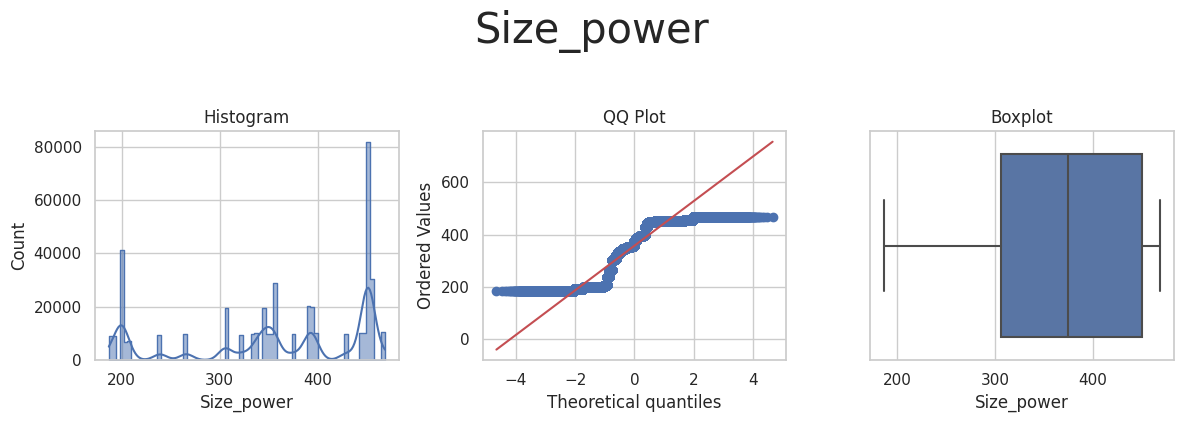

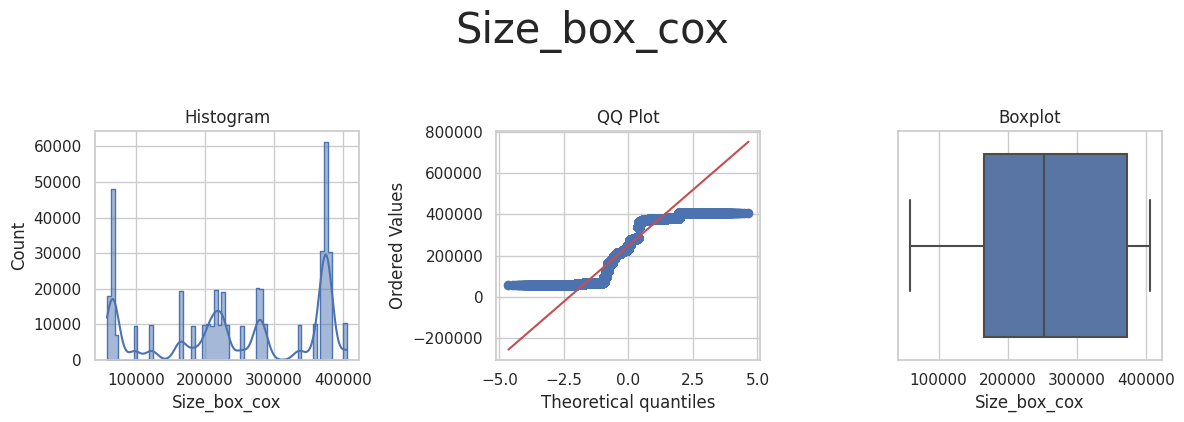

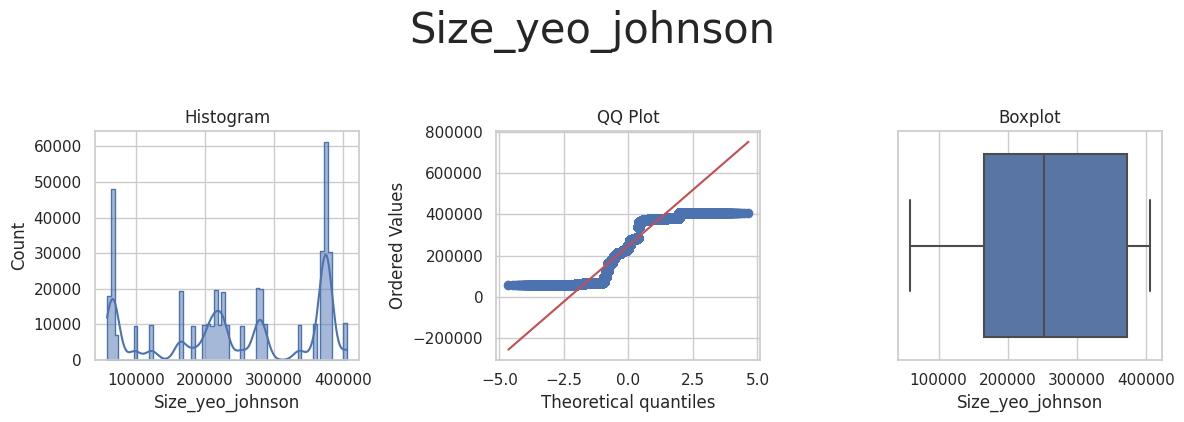

In [20]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='numerical')

For each variable, our conclusion on how the transformation(s) look(s) to be effective

- 'Temperature' - YeoJohnson looks to improve distribution to become more normally distributed

- 'MarkDown1' - YeoJohnson looks to improve distribution to become more normally distributed

- 'MarkDown2' - YeoJohnson looks to improve distribution to become more normally distributed

- 'MarkDown3' - YeoJohnson looks to improve distribution to become more normally distributed

- 'MarkDown4' - YeoJohnson looks to improve distribution to become more normally distributed

- 'MarkDown5' - YeoJohnson looks to improve distribution to become more normally distributed

For the remaining features, the approaches don't look to improve distribution to become more normally distributed

Apply the selected transformation to the Train and Test set

In [21]:
variables_engineering_yeo =  ['Temperature', 'MarkDown1',  'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
yeo_transformer = vt.YeoJohnsonTransformer(variables = variables_engineering_yeo)
df = yeo_transformer.fit_transform(df)

print("* Numerical transformation done!")

* Numerical transformation done!


### Data Split

Our data is a time series. We can't randomly select rows for train, validation and test samples. We split data by store values. We randomly select 5 stores for validattion set, 9 stores for test set and all rest for training set.

In [22]:
store_numbers = np.arange(1, 46)
np.random.seed(42)
validation_stores = np.random.choice(store_numbers, 5, replace=False)
remaining_stores = [store for store in store_numbers if store not in validation_stores]
test_stores = np.random.choice(remaining_stores, 9, replace=False)
train_stores = [store for store in remaining_stores if store not in test_stores]

print(f"Validation Stores: {validation_stores}")
print(f"Test Stores: {test_stores}")
print(f"Train Stores: {train_stores}")

#Define a function to filter the dataframe by store columns
def filter_by_store(df, store_list):
    mask = np.zeros(len(df), dtype=bool)  # Start with a mask of all False
    for store in store_list:
        mask |= (df[f'Store_{store}'] == 1)  # Set True where the store column equals 1
    return df[mask]

#Filter the dataset for each of train, validation, and test sets
train_data = filter_by_store(df, train_stores)
validation_data = filter_by_store(df, validation_stores)
test_data = filter_by_store(df, test_stores)

#Print out the shape of the datasets to confirm
print(f"Training set size: {train_data.shape}")
print(f"Validation set size: {validation_data.shape}")
print(f"Test set size: {test_data.shape}")

Validation Stores: [40 26 27 44 36]
Test Stores: [ 5 39 11  1 41 21 32 29 16]
Train Stores: [2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 22, 23, 24, 25, 28, 30, 31, 33, 34, 35, 37, 38, 42, 43, 45]
Training set size: (290130, 142)
Validation set size: (43487, 142)
Test set size: (87953, 142)


### Smart Correlated Selection

Create a separate DataFrame, with your variable(s)

In [23]:
df_engineering = train_data.drop(['Weekly_Sales'], axis=1).copy() 
# Weekly_Sales is a target variable, but when this transformer is added to the pipeline, it will not use Weekly_Sales in the calculation
# but for this analysis here, it would be suitable to drop Weekly_Sales 
df_engineering.head(3)

,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept_77,Dept_47,Dept_78,Dept_39,Dept_50,Dept_43,Dept_65,Type_A,Type_B,Type_C
10244,2011-01-04,False,138.711631,3.524,-0.0,0.0,0.0,-0.0,-0.0,214.488691,...,0,0,0,0,0,0,0,1,0,0
10245,2011-01-04,False,138.711631,3.524,-0.0,0.0,0.0,-0.0,-0.0,214.488691,...,0,0,0,0,0,0,0,1,0,0
10246,2011-01-04,False,138.711631,3.524,-0.0,0.0,0.0,-0.0,-0.0,214.488691,...,0,0,0,0,0,0,0,1,0,0


Create engineered variables(s) applying the transformation(s)

In [24]:
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6,selection_method="variance")

df_selected = corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[{'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'},
 {'Size', 'Type_A'}]

In [25]:
corr_sel.features_to_drop_

['MarkDown1', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Type_A']

### Push transformed data to Repo

In [26]:
output_path = "outputs/TrainData.csv"
train_data.to_csv(output_path, index=False)

output_path = "outputs/ValidationData.csv"
validation_data.to_csv(output_path, index=False)

output_path = "outputs/TestData.csv"
test_data.to_csv(output_path, index=False)

print(f"Cleaned data saved to {output_path}")

Cleaned data saved to outputs/TestData.csv


### Conclusions

In [27]:
print("Selected Features After Smart Correlated Selection:\n", df_selected.columns)
print("Feature engineering process complete. The final set of selected features are ready for modeling.")

Selected Features After Smart Correlated Selection:
 Index(['Date', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown2', 'CPI',
       'Unemployment', 'Size', 'Store_1', 'Store_2',
       ...
       'Dept_99', 'Dept_77', 'Dept_47', 'Dept_78', 'Dept_39', 'Dept_50',
       'Dept_43', 'Dept_65', 'Type_B', 'Type_C'],
      dtype='object', length=136)
Feature engineering process complete. The final set of selected features are ready for modeling.
